In [1]:
# updated for the trial on
# dz 6/16/22
# 7/21/22 dz change the raw data to df
# 7/21/22 dz add psth analysis
# 8/2/22 dz changed to delta f . the method is green signal minus the mean of all ctr
# 8/6/22 read the .csv file Don't need to type in the file name
# 8/7/22 dz add 1. analyze the successful trial 2. normalization by trial, and average across trials
# 8/20/22 dz add detrend both the sig and the ctr
# 8/25/22 dz add the selection of the reward trials
# 8/30 dz modified the code to select the trial ti
# 9/12 dz change to import 'Calcium_data.npy'

In [2]:
from datetime import datetime
start_time = datetime.now()

In [3]:

p_mother = 'C:/Users/Lab_PC1/Documents/fiberPhotometryData/analyzed_data_innpy/'
mouse_id = 'dz20/'
rec_d    = '20221021/'
#use_p = 'C:/Users/Lab_PC1/Documents/mouse training/Deng Zhang/behavior/' +mouse_id +'highlick'
use_p = 'C:/Users/Lab_PC1/Documents/mouse training/Deng Zhang/behavior/' +mouse_id +'nolick'

print(use_p)
p = p_mother + mouse_id
fn =  mouse_id + rec_d
print(p)
import os
os.chdir(p)
import numpy as np
import pandas as pd
new_num_arr = np.load(rec_d[0:-1]+'.npy', allow_pickle=True) # load
calcium_arr = new_num_arr[:,0:3] 
time  = calcium_arr[:,0]
sig   = calcium_arr[:,1]
pulse = calcium_arr[:,2]
df = pd.DataFrame(calcium_arr, columns = ['Time','Sig','Pulse'])


C:/Users/Lab_PC1/Documents/mouse training/Deng Zhang/behavior/dz20/nolick
C:/Users/Lab_PC1/Documents/fiberPhotometryData/analyzed_data_innpy/dz20/


In [4]:
# change from str to int
df['Sig']   = pd.to_numeric(df['Sig'])
df['Pulse'] = pd.to_numeric(df['Pulse'])
df['Time']  = pd.to_numeric(df['Time'])
print(len(df['Pulse']))
df.head(3)
#df2.Pulse
#print(max(df2['Pulse']))
#print(min(df2['Pulse']))

59334704


Time       Sig  Pulse
0  0.0000  0.002213  248.0
1  0.0001  0.003160  248.0
2  0.0002  0.004108  248.0

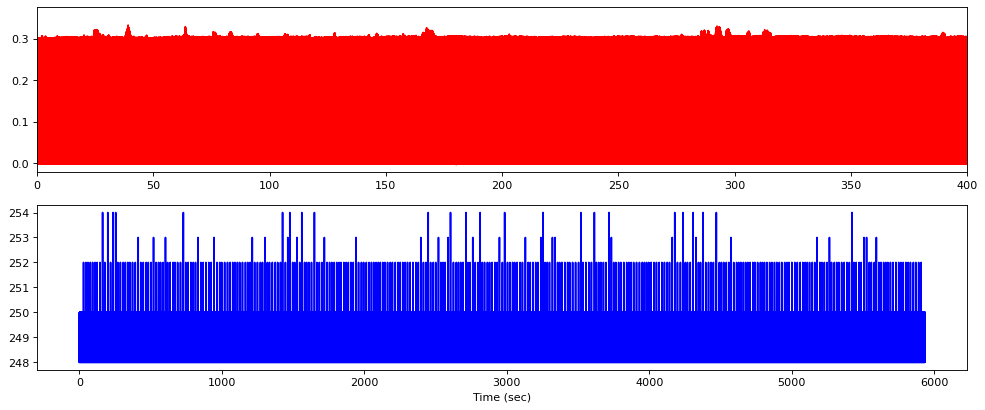

Text(0.5, 0, 'pulse value')

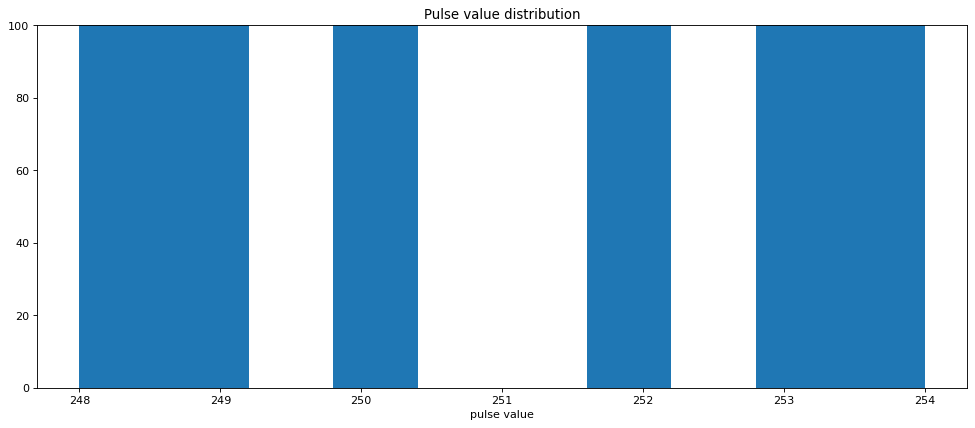

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15,6), dpi=80)
plt.subplot(211)
plt.plot(df['Time'],df['Sig'],'r')
plt.xlim(0,400)
plt.subplot(212)
plt.xlabel('Time (sec)')

plt.plot(df['Time'],df['Pulse'],'b')
#plt.xlim(43.398,43.399)
# Display result
plt.show()

figure(figsize=(15,6), dpi=80)
plt.hist(df['Pulse'])
plt.ylim(0,100)
plt.title('Pulse value distribution')
# Give x axis label for the spike raster plot
plt.xlabel('pulse value')

In [6]:
# from the last session, we know there are three value 252 is the baseline, 253 is pulse 1 and 254 is pulse 2.
#base = -10.577928 #is the baseline
ctr_amp = 249.0 # ctrl pulse
sig_amp = 250.0 #  gcamp pulse
trial_start_amp = 252.0 #  CueOn pulse ? You must make sure this is correct

print(max(df.Pulse))
print(min(df.Pulse))

254.0
248.0


In [7]:
#ctr_df
ctr_df  = df[df.Pulse == ctr_amp]# select the rows where pul1_amp
print(len(ctr_df))
Cal_df  = df[df.Pulse == sig_amp]# select the rows where pul2_amp
print(len(Cal_df))
trig_df = df[df.Pulse >= trial_start_amp]# select the rows where pul2_amp
print(trig_df)

trial_dat = trig_df['Time']
ctr_dat   = ctr_df['Sig']
Cal_dat   = Cal_df['Sig']

ctr_ind  = list(ctr_dat.index)
Cal_ind  = list(Cal_dat.index)
t_df     = Cal_df['Time']
t_ctr_df = ctr_df['Time']
#print(len(ctr_ind))
#print(len(Cal_ind))
display(trial_dat.head(3).append(trial_dat.tail(3)))

2696789
2696888
               Time       Sig  Pulse
288114      28.8115  0.003160  252.0
288115      28.8116  0.001897  252.0
288116      28.8117  0.003792  252.0
288117      28.8118  0.002529  252.0
288118      28.8119  0.000949  252.0
...             ...       ...    ...
59073763  5907.4057  0.002213  252.0
59073764  5907.4058  0.003160  252.0
59073765  5907.4059  0.004108  252.0
59073766  5907.4060  0.001897  252.0
59073767  5907.4061  0.001581  252.0

[5313 rows x 3 columns]


288114        28.8115
288115        28.8116
288116        28.8117
59073765    5907.4059
59073766    5907.4060
59073767    5907.4061
Name: Time, dtype: float64

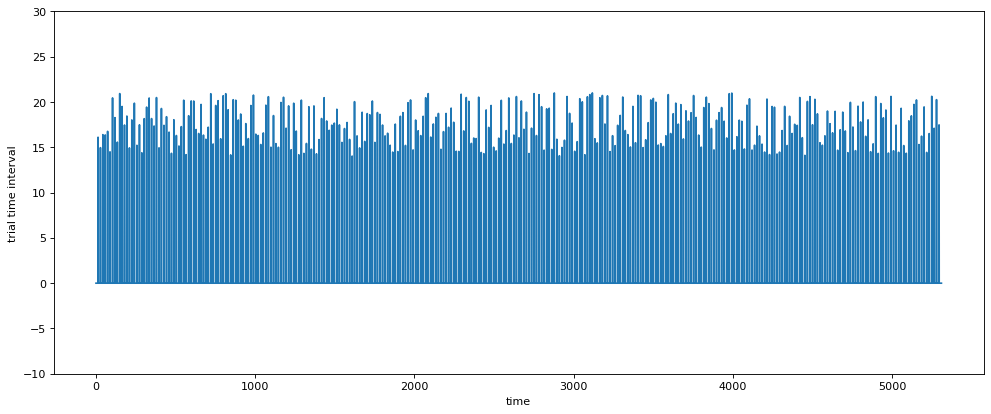

[[  14   29   44   59   74   89  105  120  135  150  165  180  195  211
   226  242  258  274  289  304  319  335  350  366  381  397  412  428
   444  460  475  490  506  522  537  552  567  583  599  615  630  646
   661  676  691  706  722  737  753  768  784  800  816  831  847  863
   879  895  910  926  942  958  974  990 1005 1020 1036 1052 1068 1084
  1100 1116 1131 1147 1163 1179 1195 1211 1227 1243 1259 1275 1291 1307
  1323 1338 1354 1370 1386 1402 1418 1434 1450 1466 1482 1498 1514 1530
  1546 1562 1578 1594 1610 1625 1641 1657 1673 1689 1705 1721 1737 1753
  1769 1785 1801 1817 1833 1849 1865 1881 1897 1913 1929 1945 1961 1977
  1993 2009 2025 2041 2056 2072 2088 2104 2120 2136 2152 2168 2184 2200
  2216 2232 2248 2264 2280 2295 2311 2327 2343 2359 2374 2389 2405 2421
  2437 2452 2468 2483 2499 2515 2531 2547 2563 2578 2594 2610 2626 2642
  2658 2673 2689 2705 2721 2737 2753 2768 2784 2800 2816 2832 2848 2864
  2880 2896 2912 2928 2944 2960 2976 2992 3008 3024 3040 3056 30

0         28.8115
14        44.9202
29        59.8800
44        76.2756
59        92.6367
          ...    
5235    5831.9562
5251    5852.5801
5266    5869.6759
5281    5889.9347
5297    5907.4046
Name: Time, Length: 336, dtype: float64

0        28.8115
1        44.9202
2        59.8800
3        76.2756
4        92.6367
         ...    
331    5831.9562
332    5852.5801
333    5869.6759
334    5889.9347
335    5907.4046
Name: Time, Length: 336, dtype: float64

In [8]:
trial_time_arr = np.array(trial_dat)
tmp1           = np.diff(trial_time_arr)
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize =(15,6), dpi=80)
plt.plot(tmp1)
#plt.xlim(0,25)
plt.ylabel('trial time interval')
plt.xlabel('time')
plt.ylim(-10,30)
plt.show()
trig_on        = np.where(tmp1>10)
cc             = np.array(trig_on)
cc2            = cc + 1
print(cc2)

trial_on_ind = np.concatenate((0,cc2),axis = None)
print(trial_on_ind)
trial_dat_reset = trial_dat.reset_index(drop = True)
print(trial_dat_reset.head(30))
trial_on_time = trial_dat_reset.iloc[trial_on_ind]
display(trial_on_time)
print(trial_dat_reset.iloc)
trial_on_time_reset = trial_on_time.reset_index(drop = True)
display(trial_on_time_reset)
np.savetxt("trial_on.csv", trial_on_time, delimiter=",")

In [9]:
# reward time
import os
os.chdir(use_p)
entries = os.listdir()
li = []
for file in entries:
    # Check whether file is in text format or not
    #if file.endswith("use_df.csv"):
    if "use_df.csv" in file:
        if rec_d[0:-1] in file:
            use_fn = file
            print(use_fn)

dz20_08_nolick_20221021-1702use_df.csv


In [10]:
import pandas as pd

use_df = pd.read_csv(use_fn,sep='\s\s+', header=0,engine='python')

#display(use_df.head(5).append(use_df.tail(5)))

use_df2 = use_df[',Time Stamps,port,threshold'].str.split(',', expand=True)
use_df2.columns =['','Time','port','threshold']
use_df2 = use_df2.reset_index(drop=True)
display(use_df2.head(3).append(use_df2.tail(3)))

#use_df2.loc[use_df2['port'] == 44]
tri_df = use_df2['port']
tdf = tri_df.to_frame()
display(tdf)
use_df3 = tdf.loc[tdf['port'] == '44']
display(use_df3)
trial_num = np.arange(0,len(use_df3),1)
print(trial_num)
use_df3.insert(loc=1, column='Trial_num', value = trial_num)
#use_df3['trial_num'] = trial_num 
display(use_df3)

ID = pd.to_numeric(use_df2['port'])
port_v = ID.diff()
display(port_v)

#miss_ind = port_v.loc[port_v == 0]
#df.loc[port_v() == 0]

miss_ind = port_v[port_v == 0].index-1
print(miss_ind)

mis_df = use_df3.loc[miss_ind] 
display(use_df3.loc[miss_ind])
miss_t = mis_df['Trial_num']
print(miss_t)

miss_t_array = miss_t.to_numpy()
print(miss_t_array)

Time port threshold
0      0    47548   44         0
1      1    63641   44         0
2      2    78587   44         0
413  413  5903015   44         0
414  414  5920468   44         0
415  415  5921970   14         0

port
0     44
1     44
2     44
3     44
4     14
..   ...
411   44
412   44
413   44
414   44
415   14

[416 rows x 1 columns]

port
0     44
1     44
2     44
3     44
5     44
..   ...
410   44
411   44
412   44
413   44
414   44

[336 rows x 1 columns]

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

port  Trial_num
0     44          0
1     44          1
2     44          2
3     44          3
5     44          4
..   ...        ...
410   44        331
411   44        332
412   44        333
413   44        334
414   44        335

[336 rows x 2 columns]

0       NaN
1       0.0
2       0.0
3       0.0
4     -30.0
       ... 
411     0.0
412     0.0
413     0.0
414     0.0
415   -30.0
Name: port, Length: 416, dtype: float64

Int64Index([  0,   1,   2,   5,   6,   7,   8,   9,  12,  13,
            ...
            398, 401, 402, 403, 406, 409, 410, 411, 412, 413],
           dtype='int64', length=256)


port  Trial_num
0     44          0
1     44          1
2     44          2
5     44          4
6     44          5
..   ...        ...
409   44        330
410   44        331
411   44        332
412   44        333
413   44        334

[256 rows x 2 columns]

0        0
1        1
2        2
5        4
6        5
      ... 
409    330
410    331
411    332
412    333
413    334
Name: Trial_num, Length: 256, dtype: int32
[  0   1   2   4   5   6   7   8  10  11  12  13  14  15  16  17  18  19
  20  22  23  24  26  27  28  29  30  32  33  34  35  36  37  38  39  40
  41  42  44  47  48  49  50  51  53  54  55  56  57  58  60  61  62  63
  64  66  67  69  70  72  73  75  76  77  78  79  80  81  82  84  85  86
  87  89  92  93  95  96  97 101 102 103 104 106 107 109 110 111 112 113
 115 117 118 119 120 122 125 126 127 128 129 130 131 132 133 135 136 137
 140 141 142 143 144 145 147 148 150 151 152 153 154 157 158 159 160 162
 163 164 165 166 167 169 172 173 174 176 178 180 181 182 183 184 185 186
 187 189 191 192 193 194 195 197 198 199 201 203 205 206 207 208 209 210
 211 212 213 214 216 217 218 221 223 224 226 228 229 231 232 233 234 235
 236 239 240 241 243 244 245 246 247 248 249 250 251 252 253 254 255 256
 258 259 260 261 263 265 266 267 

In [11]:
import numpy as np
ctr_ind_arr = np.array(ctr_ind)
tmp1        = np.diff(ctr_ind_arr)

x1          = np.where(tmp1>1)

Cal_ind_arr = np.array(Cal_ind)

tmp2        = np.diff(Cal_ind_arr)

x2          = np.where(tmp2>1)
print(np.shape(x2))
np.shape(x2)
np.shape(x1)
print(len(t_df))

(1, 179801)
2696888


In [12]:
ctr_dat_df = ctr_dat.iloc[x1]
#print(ctr_dat_df)
Cal_dat_df = Cal_dat.iloc[x2]
#print(Cal_dat_df)
t_ctr = t_ctr_df.iloc[x1]
t_sig = t_df.iloc[x2]
#print(t_ctr)
#print(t_sig)

In [13]:
# reset the index for subtraction
# zd changed to ddf 8/1/2022
# zd add detrending on 8/20/2022
import statistics
pul1r = ctr_dat_df.reset_index(drop=True)
pul2r = Cal_dat_df.reset_index(drop=True)

from scipy import signal
ctr_detrended = signal.detrend(pul1r)
sig_detrended = signal.detrend(pul2r)

print(pul1r.mean())
#print(pul2r)
constant = 0.3
m_ctr = ctr_detrended.mean()+constant
print(m_ctr)
#ddf = (pul2r+constant-m_ctr)/m_ctr  # this method there will be drifting
ddf = (sig_detrended+constant-m_ctr)/m_ctr  # this method there will be drifting
#ddf = (pul2r-pul1r)/m_ctr  # this method there will be no drifting
print(ddf.mean())

0.3038211734585529
0.30000000000000004
-2.873374581738527e-16


In [14]:
# 8/25 Deng added the reward trials
import os
entries = os.listdir()
li = []
for file in entries:
    # Check whether file is in text format or not
    if file.endswith("rewardDf.csv"):
        fn = file
        print(fn)
        
import pandas as pd
#fn = 'dz21_02_nolick_80max_20220805-1227rewardDf.csv'
#Reward_df = pd.read_csv(fn,sep='\s\s+', header = 0,engine='python')
#print('The reward number is : '+str(len(Reward_df)))
#Reward_df.head(5)       

#df2 = df
#Reward_df2 = Reward_df[',Time Stamps,port,threshold'].str.split(',', expand=True)
#Reward_df2.columns =['Index','Time','port','threshold']
#Reward_df2 = Reward_df2.reset_index(drop=True)
#display(Reward_df2.head(3).append(Reward_df2.tail(3)))
display(trial_on_time_reset)
#miss_t_array = miss_t_array[0:-4] only for dz14 1007
#miss_t_array = miss_t_array[0:-10] #only for dz20 1007
miss_trial = trial_on_time_reset.index.isin(miss_t_array)
#print(miss_trial)
mis_trial = trial_on_time_reset[miss_t_array]
print(mis_trial)
#print(trial_on_time_reset)
sucsessful_trial = trial_on_time_reset.drop(miss_t_array)
mis_trial = trial_on_time_reset[miss_t_array]
display(sucsessful_trial.head(15))
#display(mis_trial)

rw_time = sucsessful_trial.add(1.5)
miss_rw_time = mis_trial.add(1.5)

display(rw_time)
display(miss_rw_time)
#rw_time.head(3).append(rw_time.tail(3))

dz20_01_nolick_20221013-1102rewardDf.csv
dz20_02_nolick_20221014-1156rewardDf.csv
dz20_03_nolick_20221015-1430rewardDf.csv
dz20_04_nolck_20221017-1110rewardDf.csv
dz20_05_nolick_20221018-1314rewardDf.csv
dz20_06_nolick_20221019-1148rewardDf.csv
dz20_07_nolick_20221020-1242rewardDf.csv
dz20_08_nolick_20221021-1702rewardDf.csv


0        28.8115
1        44.9202
2        59.8800
3        76.2756
4        92.6367
         ...    
331    5831.9562
332    5852.5801
333    5869.6759
334    5889.9347
335    5907.4046
Name: Time, Length: 336, dtype: float64

0        28.8115
1        44.9202
2        59.8800
4        92.6367
5       109.3974
         ...    
330    5815.4437
331    5831.9562
332    5852.5801
333    5869.6759
334    5889.9347
Name: Time, Length: 256, dtype: float64


3       76.2756
9      178.1855
21     392.0082
25     468.4549
31     569.4756
43     782.5337
45     814.7613
46     831.9749
52     944.6355
59    1075.9786
65    1181.4839
68    1229.6717
71    1284.9103
74    1333.8218
83    1496.7079
Name: Time, dtype: float64

3        77.7756
9       179.6855
21      393.5082
25      469.9549
31      570.9756
         ...    
320    5645.6535
323    5693.1012
327    5766.8258
329    5802.5087
335    5908.9046
Name: Time, Length: 80, dtype: float64

0        30.3115
1        46.4202
2        61.3800
4        94.1367
5       110.8974
         ...    
330    5816.9437
331    5833.4562
332    5854.0801
333    5871.1759
334    5891.4347
Name: Time, Length: 256, dtype: float64

336


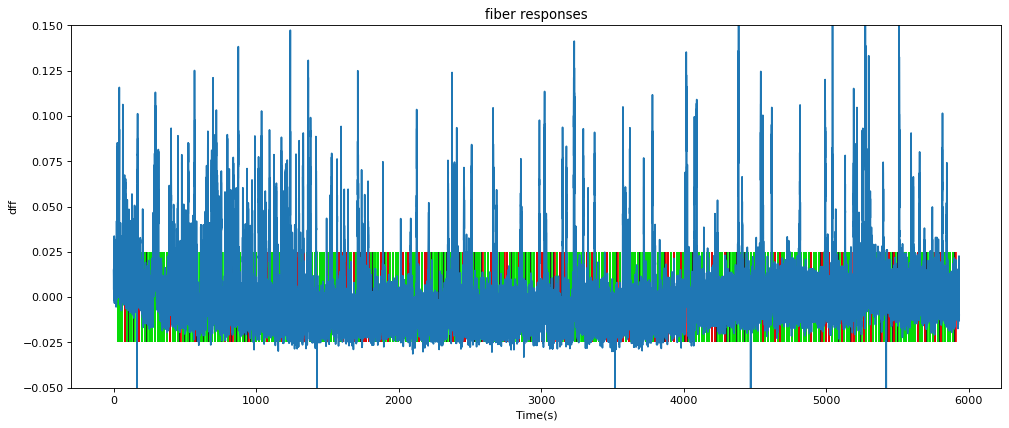

In [15]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15,6), dpi=80)

#plt.plot(t,diff_sig)
#plt.plot(t,df)
colorCodes = np.array([[0, 0, 0],
                        [1, 0, 0],
                        [0, 1, 0]])
lineSize = [0.05, 0.02]
plt.plot(t_sig,ddf)
#print(ddf)
plt.eventplot(trial_on_time, color = colorCodes[0,:], lineoffsets = 0,linelengths = lineSize[0])  
plt.eventplot(rw_time, color = colorCodes[1,:], lineoffsets = 0,linelengths = lineSize[0])  
plt.eventplot(miss_rw_time, color = colorCodes[2,:], lineoffsets = 0,linelengths = lineSize[0])  


print(len(trial_on_time))
#plt.plot(ddf)
plt.title('fiber responses')
# Give x axis label for the spike raster plot
plt.xlabel('Time(s)')
plt.ylim(-0.05, 0.15)
#plt.xlim(0,200)
plt.ylabel('dff')

plt.show()

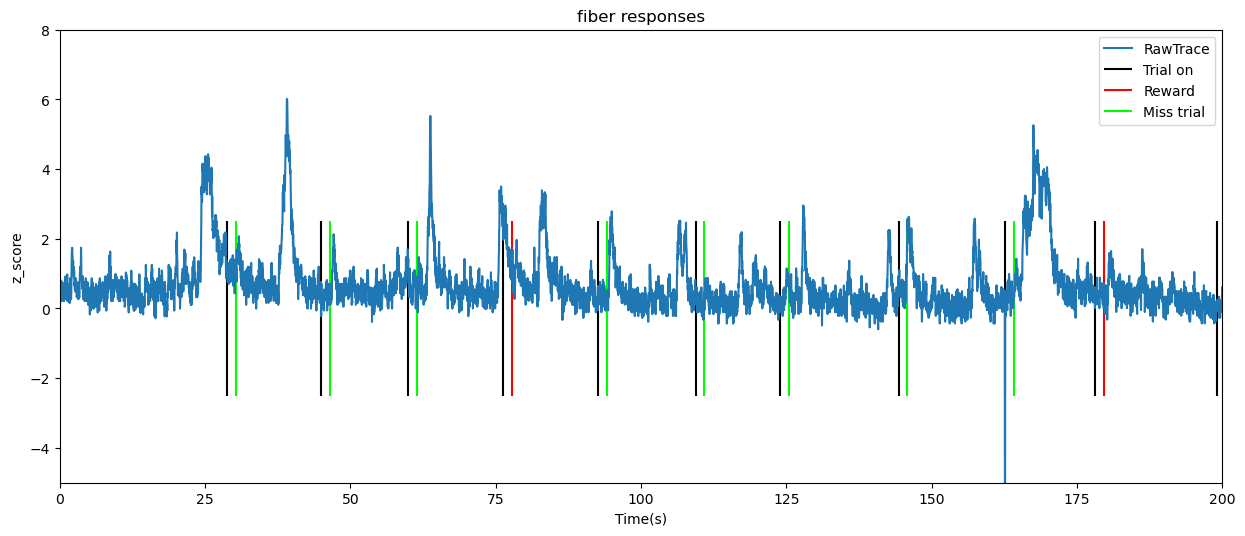

In [16]:
#from scipy.stats import zscore
from scipy import stats
#import statistics as stats
#print(ddf)
#ddf_ar = ddf.to_numpy()
ddf_ar = ddf.copy()
#print(ddf_ar)
z_score_aad = stats.zscore(ddf_ar)
#print(z_score_aad)
#figure(figsize=(15,6), dpi=80)
labels = ['RawTrace','Trial on','Reward','Miss trial']
fig, axs = plt.subplots(figsize=(15,6), dpi=100)
colorCodes = np.array([[0, 0, 0],
                        [1, 0, 0],
                        [0, 1, 0]])
lineSize = [0.05, 0.02]
plt.plot(t_sig,z_score_aad)

axs.eventplot(trial_on_time, color = colorCodes[0,:], lineoffsets = 0,linelengths = 5)  
axs.eventplot(rw_time, color = colorCodes[1,:], lineoffsets = 0,linelengths =  5)  
axs.eventplot(miss_rw_time, color = colorCodes[2,:], lineoffsets = 0,linelengths = 5)
axs.legend(labels)

plt.title('fiber responses')
# Give x axis label for the spike raster plot
plt.xlabel('Time(s)')
plt.ylim(-5, 8)
plt.xlim(0, 200)
plt.ylabel('z_score')

plt.show()

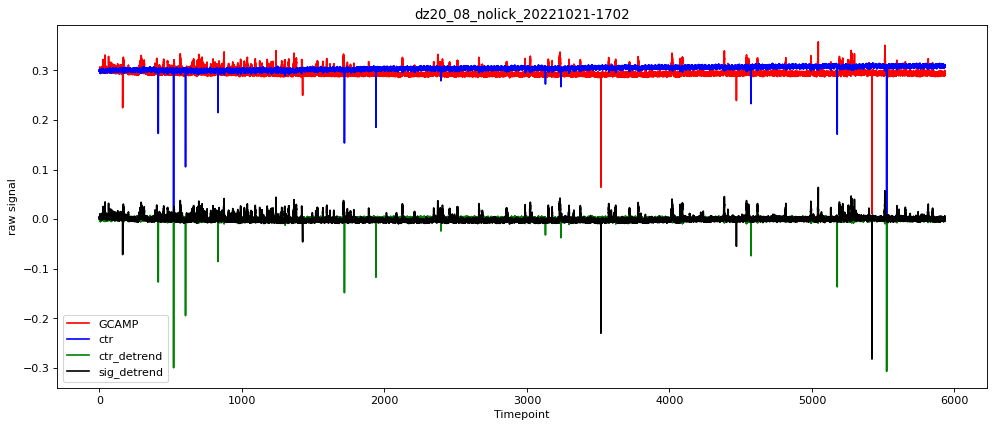

In [17]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15,6), dpi=80)
#plt.subplot(211)

plt.plot(t_sig,pul2r,'r',label = 'GCAMP')
plt.plot(t_ctr,pul1r,'b',label = 'ctr')
plt.plot(t_ctr,ctr_detrended,'g',label = 'ctr_detrend')
plt.plot(t_sig,sig_detrended,'k',label = 'sig_detrend')


#plt.ylim(0.2, 0.4)
plt.legend(loc='best')
plt.xlabel('Timepoint')
plt.ylabel('raw signal')
plt.title(use_fn[0:-10])
plt.show()

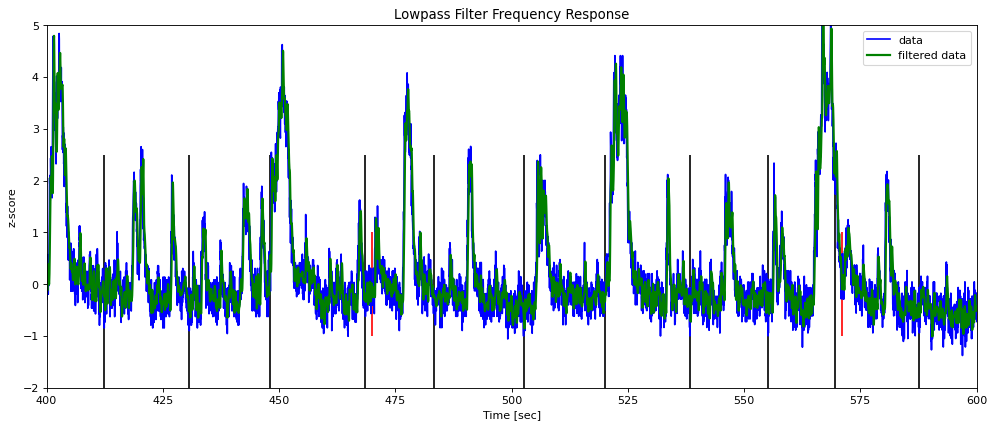

In [18]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15,6), dpi=80)

def butter_lowpass(cutoff, fs, order=5):
    return butter(order, cutoff, fs=fs, btype='low', analog=False)

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 6
fs = 30.0       # sample rate, Hz
cutoff = 3.667  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, fs=fs, worN=8000)
#plt.subplot(2, 1, 1)
plt.plot(w, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()


# Demonstrate the use of the filter.
# First make some data to be filtered.
T = 12.0         # seconds
n = int(T * fs) # total number of samples
t = t_ctr
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
#data = pul2r
data = z_score_aad

# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)

#plt.subplot(2, 1, 2)
plt.plot(t_sig,data, 'b-', label='data')
plt.eventplot(trial_on_time, color = colorCodes[0,:], lineoffsets=0,linelengths = 5)  
plt.eventplot(rw_time, color = colorCodes[1,:], lineoffsets = 0,linelengths = 2)  


plt.plot(t_sig,y, 'g-', linewidth=2, label='filtered data')
plt.ylim(-2,5)
#plt.xlim(0,1600)

plt.xlim(400,600)
plt.ylabel('z-score')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

In [19]:
# psth  people usally plot heat map. 
# dz add on 6/16/22
import seaborn as sns; sns.set_theme()
trial_num = trial_on_time.size
win = [-5,10]
samp_rate = 10000
trial_num
type(t_sig)
type(data)
# construct a dataframe

t_sig_res = t_sig.reset_index(drop=True)
t_sig_res
df_n = pd.DataFrame({'time': t_sig_res, 'data': data})
df_n

time      data
0          0.0272  0.758430
1          0.0602  0.648999
2          0.0932  0.539741
3          0.1262  0.813156
4          0.1592  0.813159
...           ...       ...
179796  5933.3359 -0.570020
179797  5933.3689 -0.186999
179798  5933.4019 -0.405864
179799  5933.4349 -0.296427
179800  5933.4679 -0.515292

[179801 rows x 2 columns]

(336, 336)
29.3115


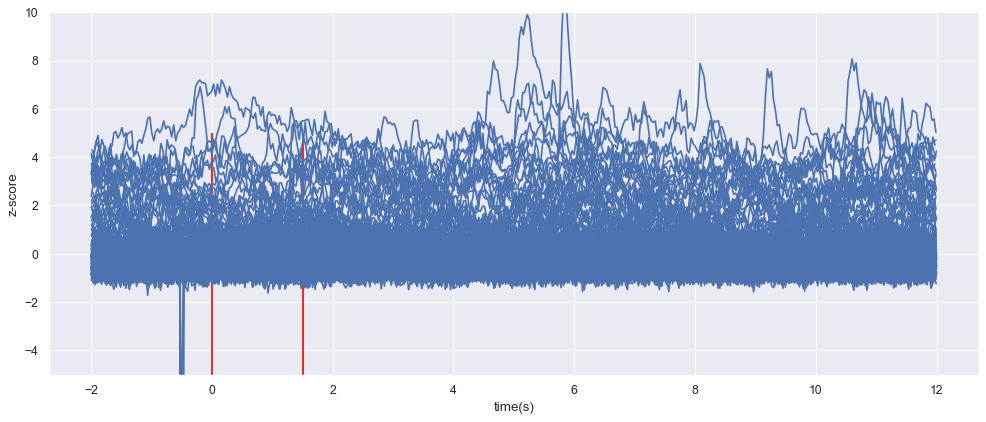

In [20]:
# plt each trials
transient_matrix = np.zeros((len(trial_on_time),trial_num))

cue_on_time = trial_on_time+0.5# 0.5s after the trial on the cue will be on 
#time_wid = [-2:12]
print(np.shape(transient_matrix))
#transient_matrix = []
figure(figsize=(15,6), dpi=80)
aa = [];
trial_n = 0

print(cue_on_time[0])
for i in cue_on_time:
    winStart = i - 2 # 2s before cue
    winEnd   = i + 12  # 12s after cue
    
    #print(trial_n)
    #print(winStart)
    #print(winEnd)
    trancient = df_n.loc[(df_n["time"] > winStart) & (df_n["time"] <  winEnd)]
    #print(trancient)
    t_reset = (trancient["time"]-i)
    ave_transient = pd.DataFrame(trancient['data']).to_numpy()
    #print(np.shape(ave_transient))
    ave_transient = transient_matrix[:,trial_n] 
    trial_n = trial_n + 1
    #print(i)
    #vv = np.concatenate((ave_transient, transient_matrix), axis=1)
    #tmp = pd.concat([trancient['data'],aa],axis = 1)
    #print(t_reset)
    plt.plot(t_reset,trancient['data'], 'b-', label='data')
    #plt.eventplot(trial_on_time, color = colorCodes[0,:], lineoffsets=0,linelengths = 1)  
    
plt.ylim(-5, 10)
#plt.legend(loc='best')
plt.eventplot([1.5], color = colorCodes[1,:], lineoffsets=0,linelengths = 10)  
plt.eventplot([0], color = colorCodes[1,:], lineoffsets=0,linelengths = 10)  
plt.xlabel('time(s)') 
plt.ylabel('z-score')
    #plt.title(fn[0:-4])
    #ave_transient = pd.DataFrame(trancient['data']).to_numpy()
plt.show() 

#ave_transient
#trancient['data']

<Figure size 1200x480 with 0 Axes>

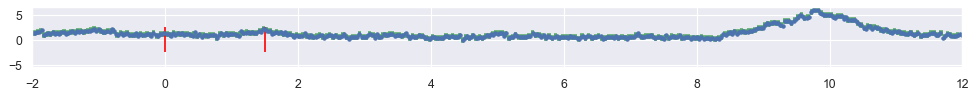

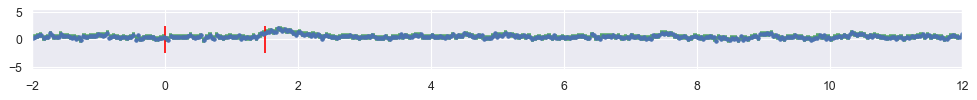

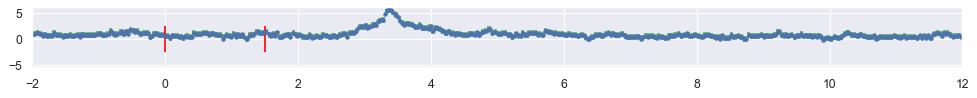

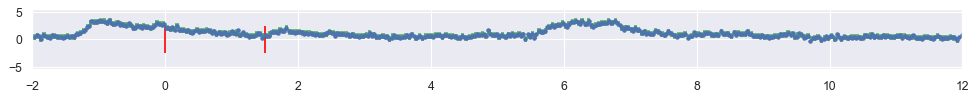

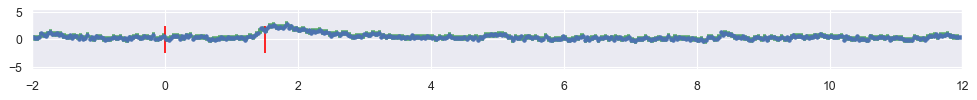

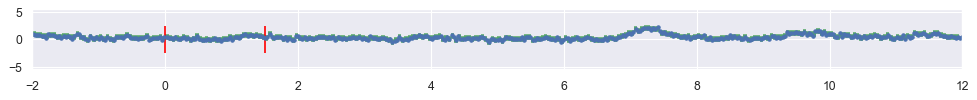

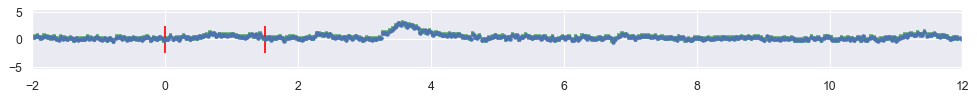

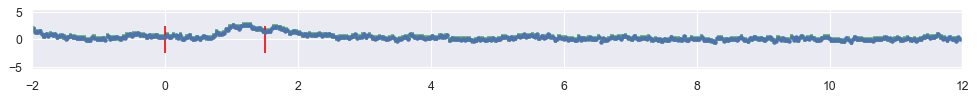

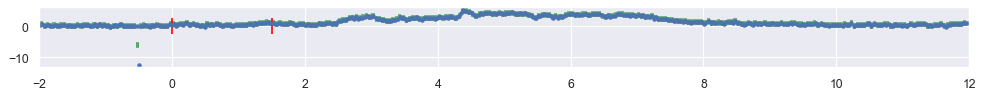

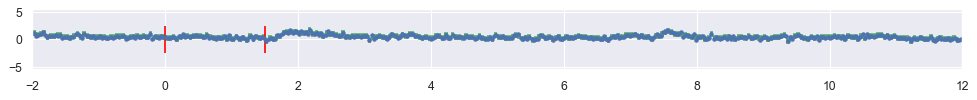

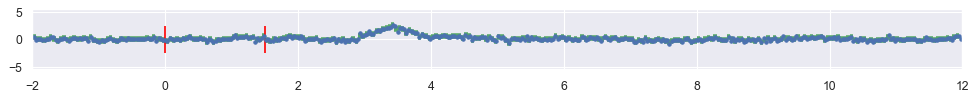

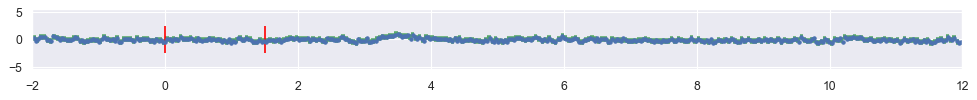

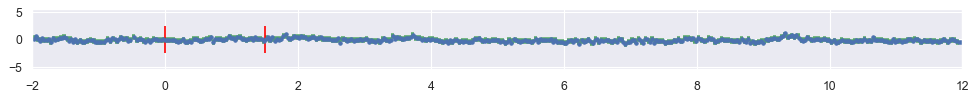

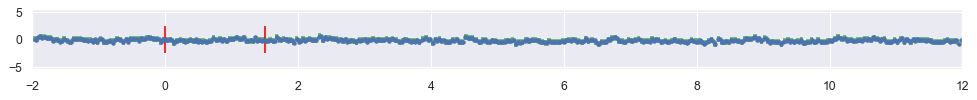

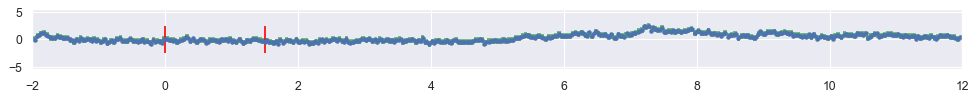

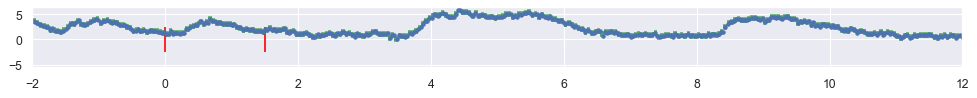

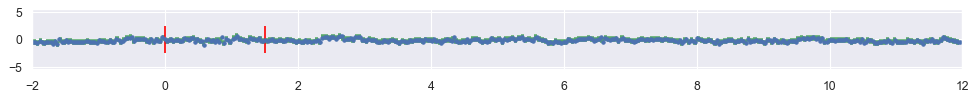

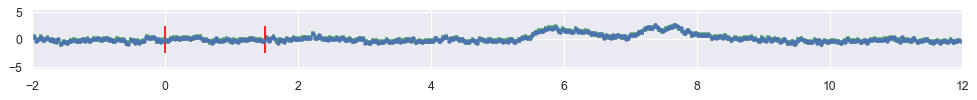

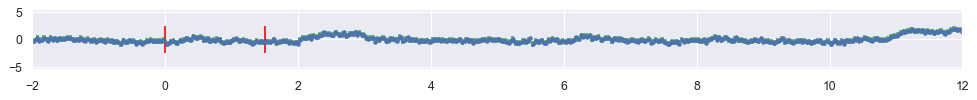

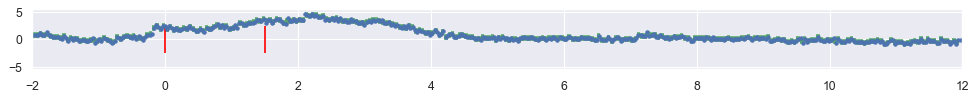

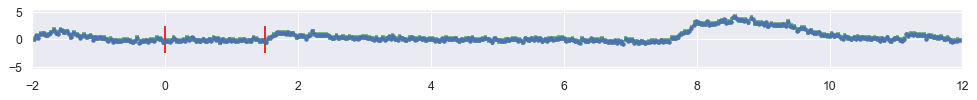

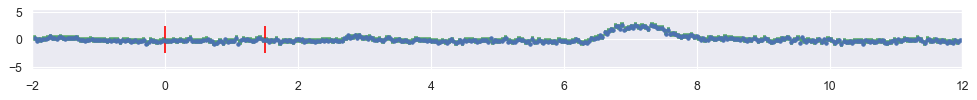

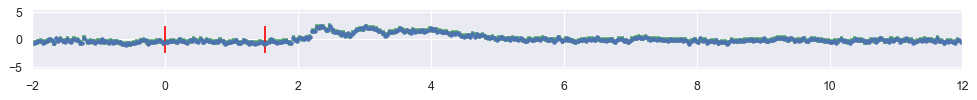

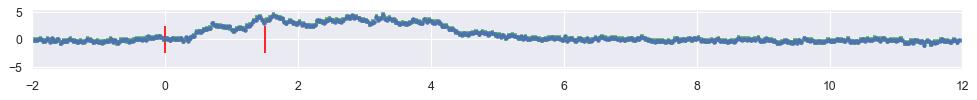

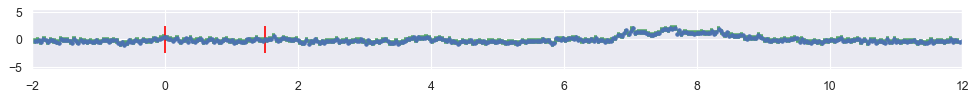

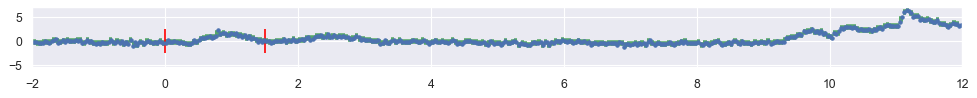

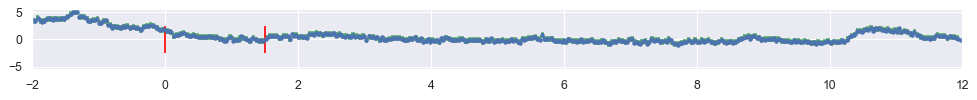

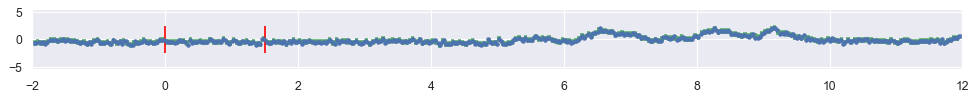

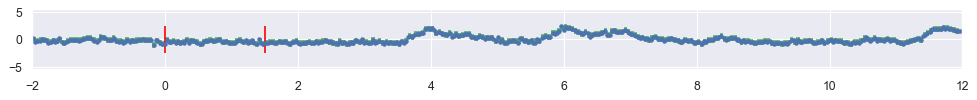

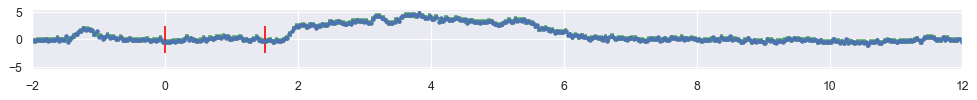

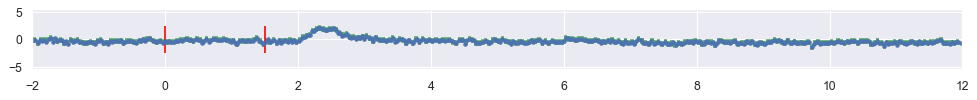

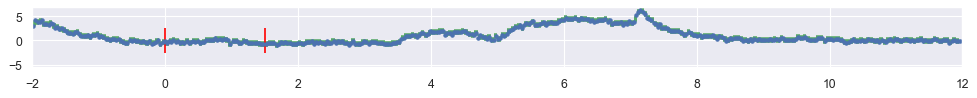

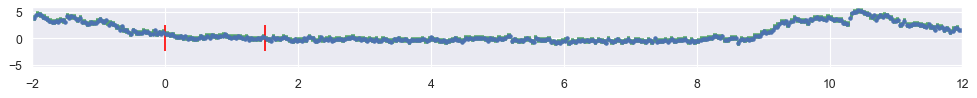

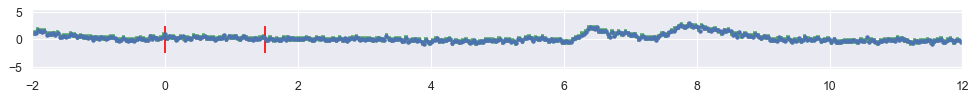

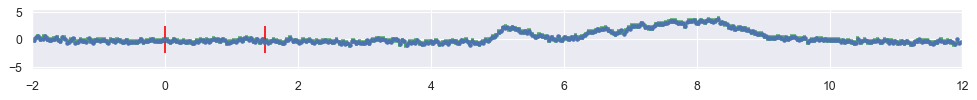

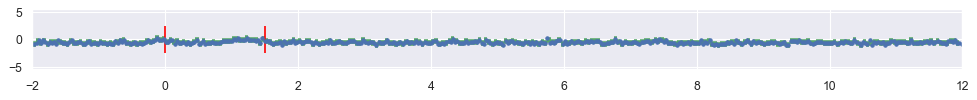

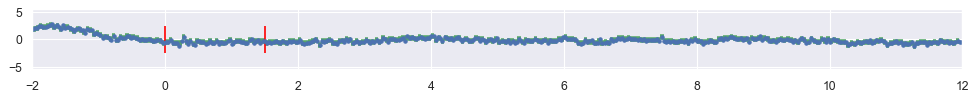

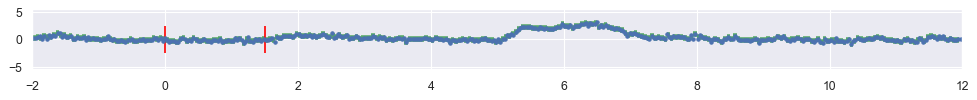

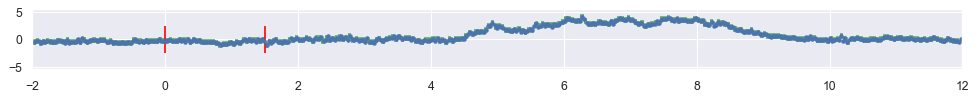

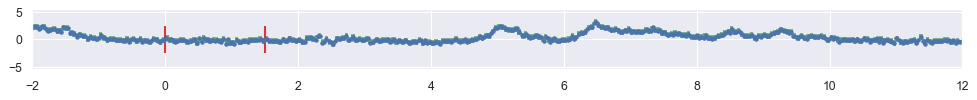

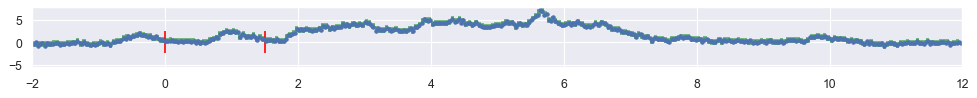

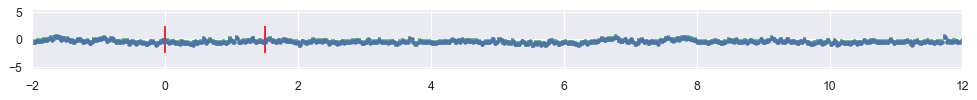

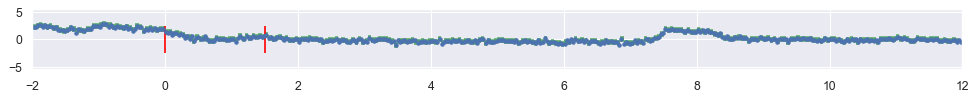

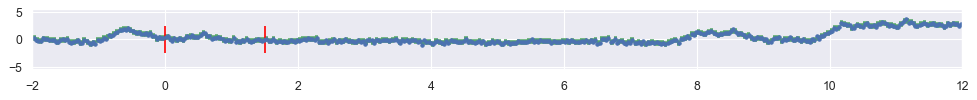

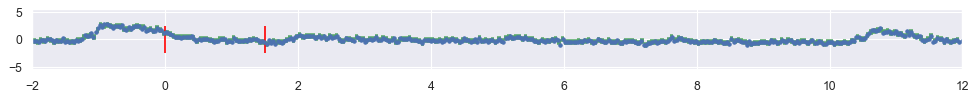

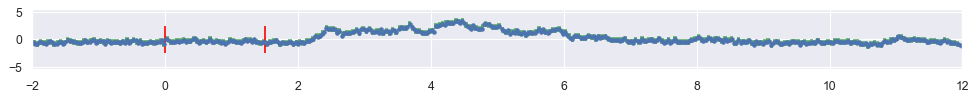

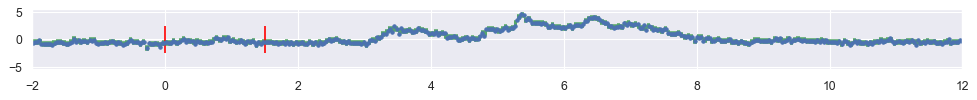

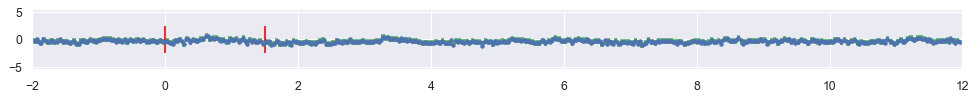

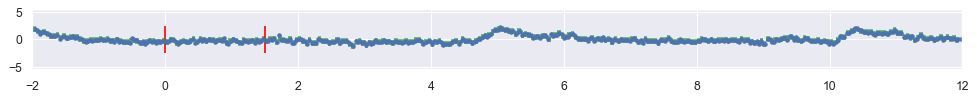

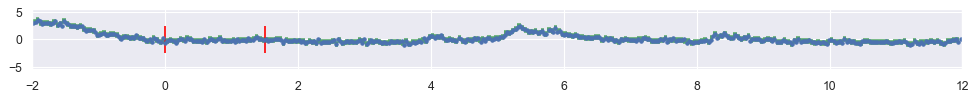

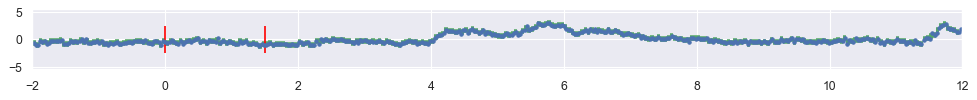

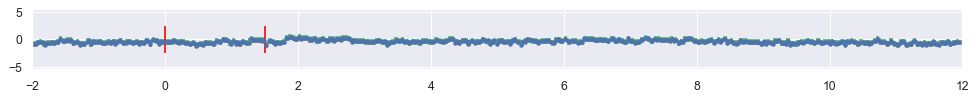

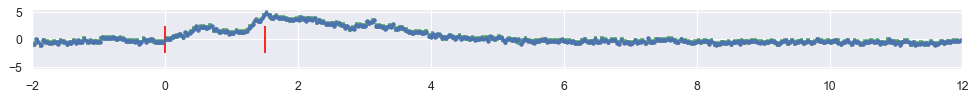

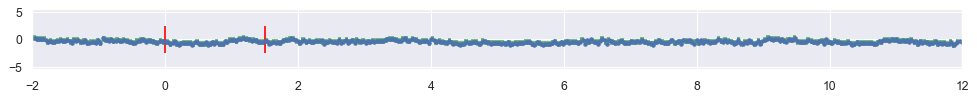

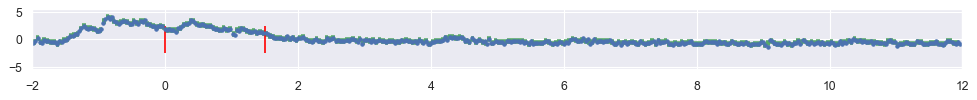

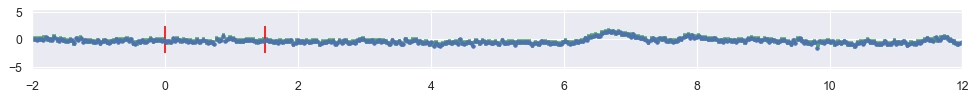

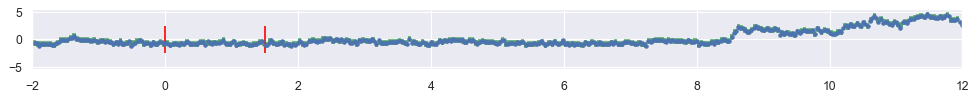

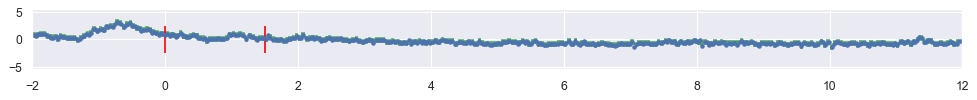

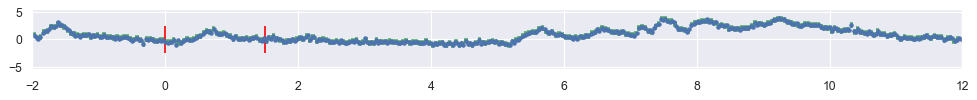

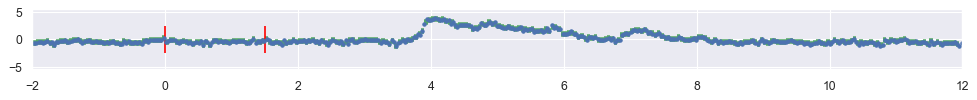

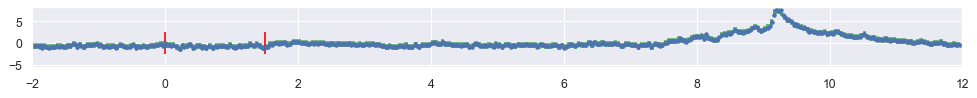

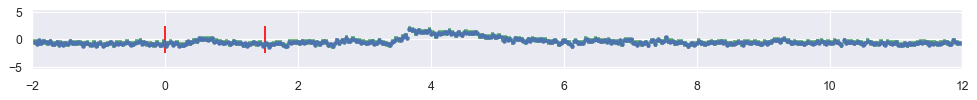

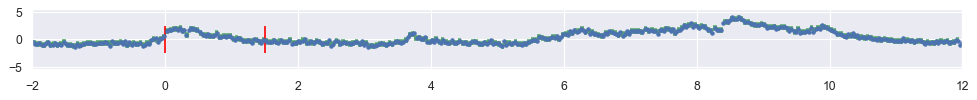

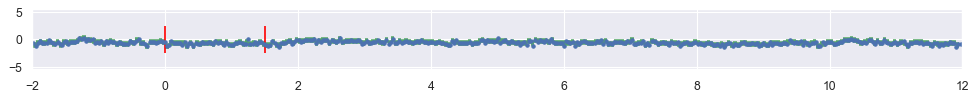

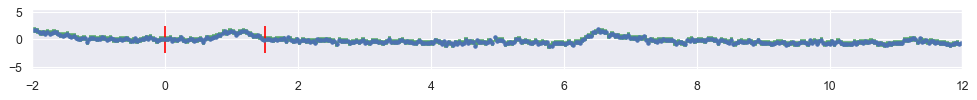

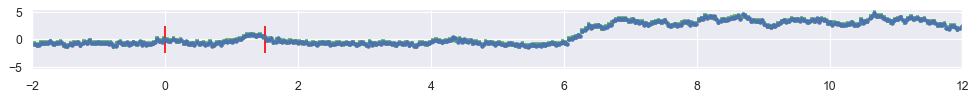

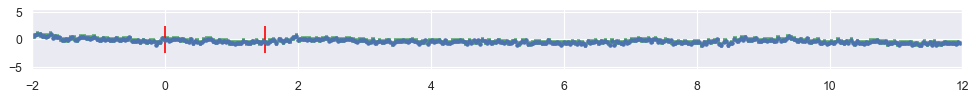

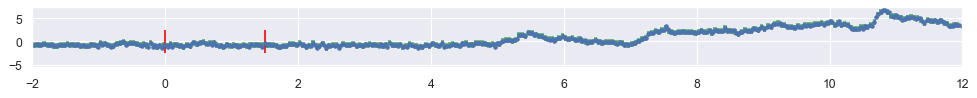

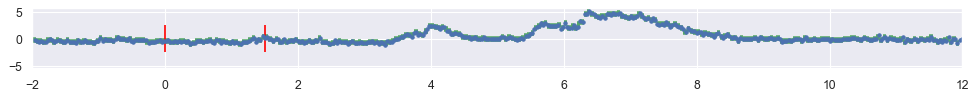

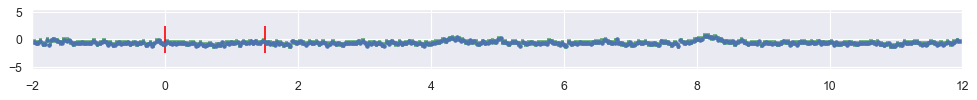

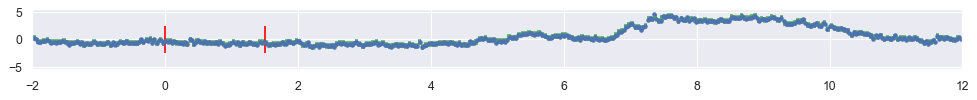

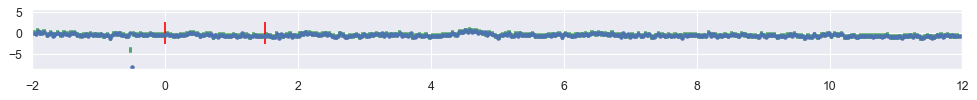

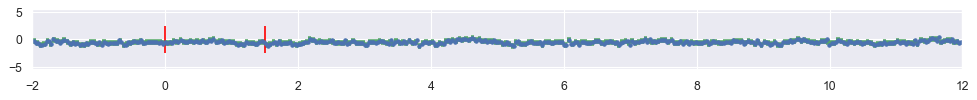

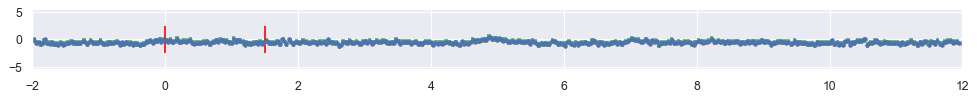

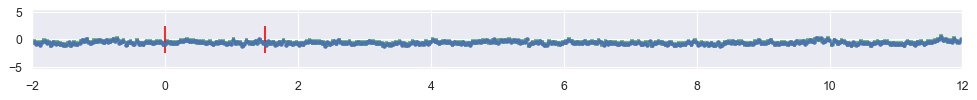

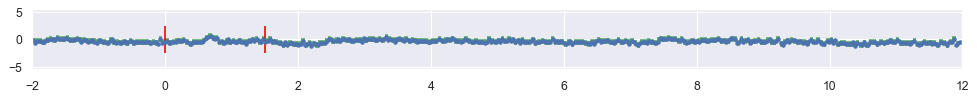

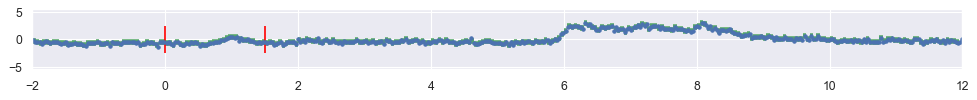

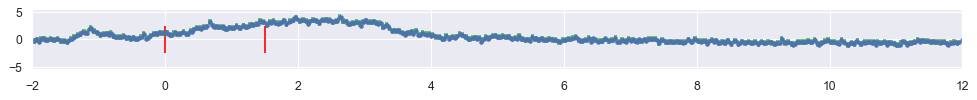

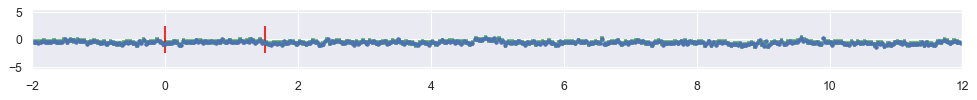

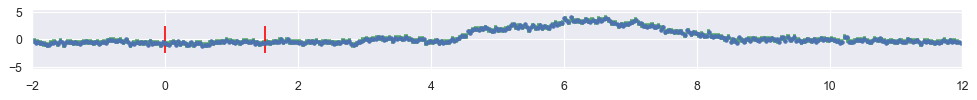

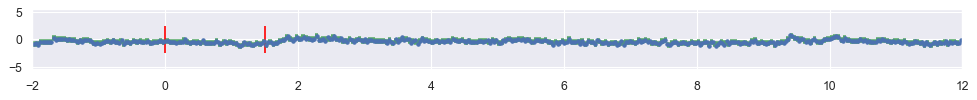

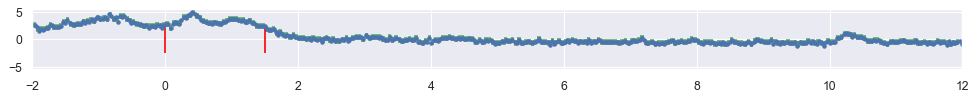

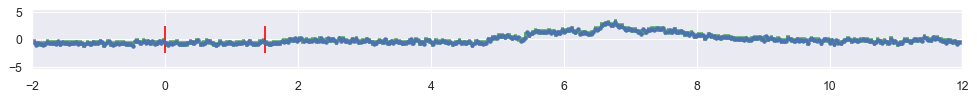

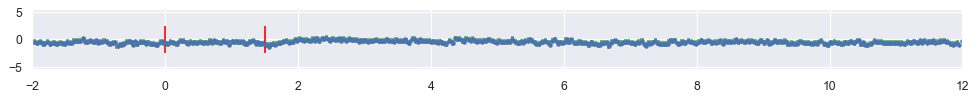

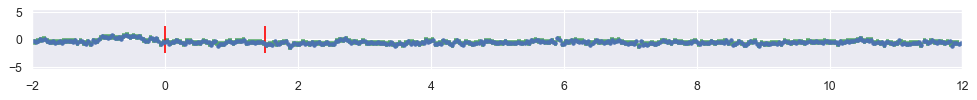

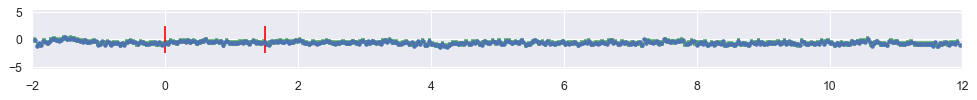

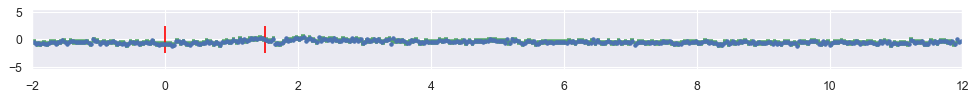

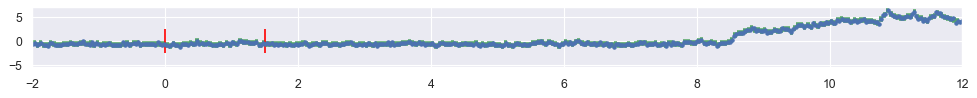

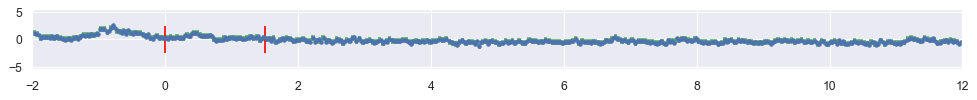

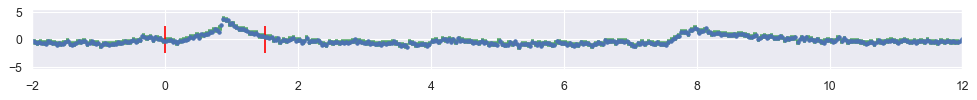

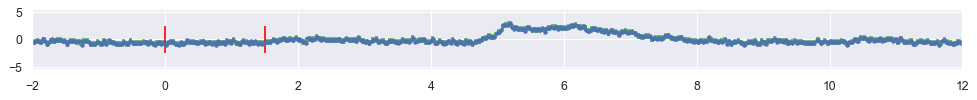

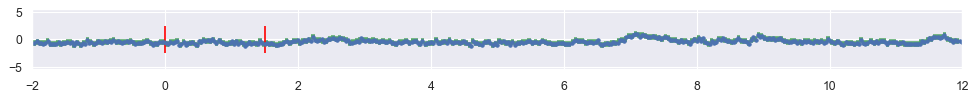

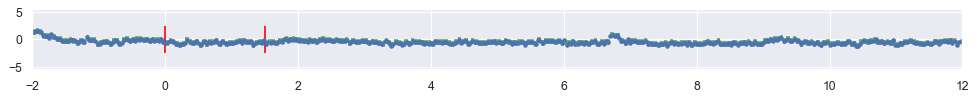

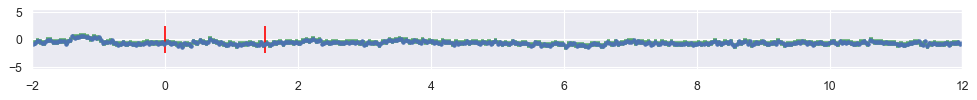

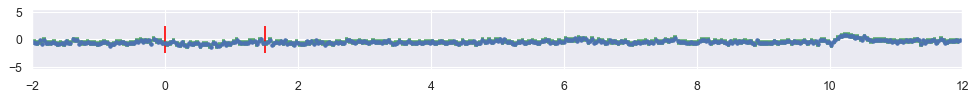

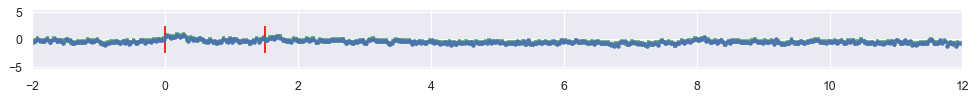

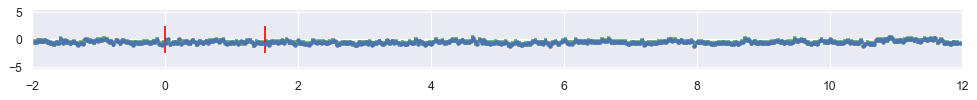

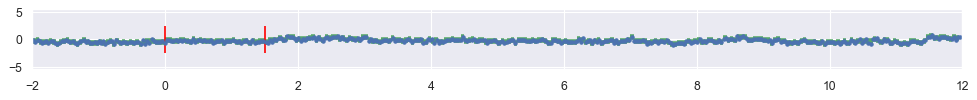

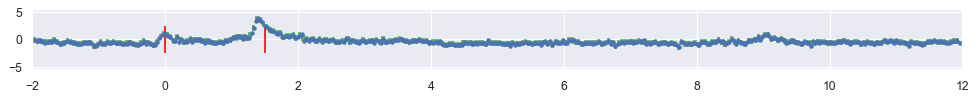

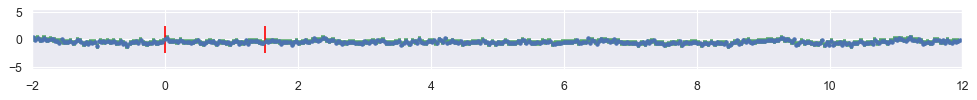

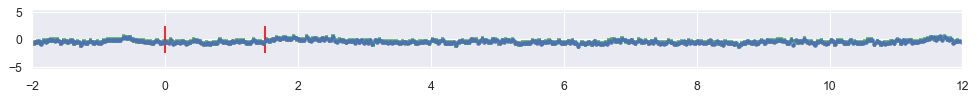

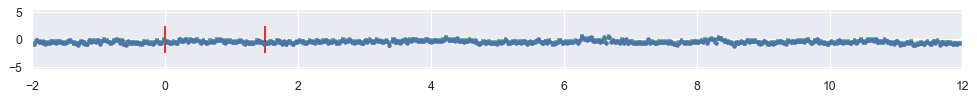

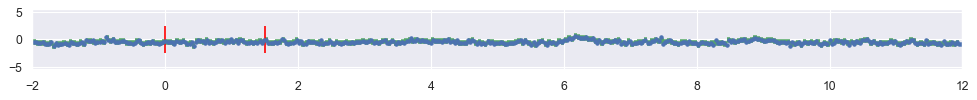

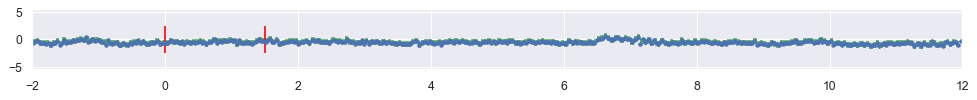

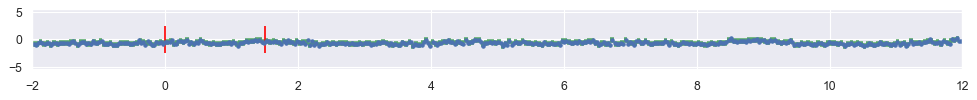

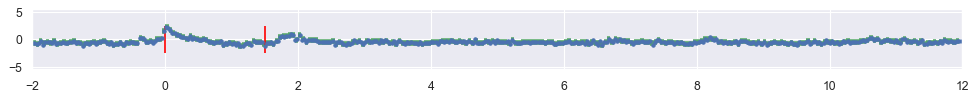

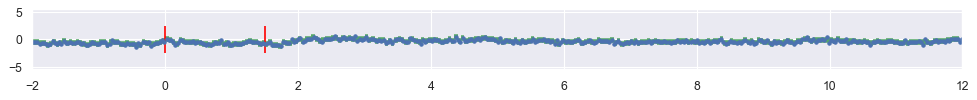

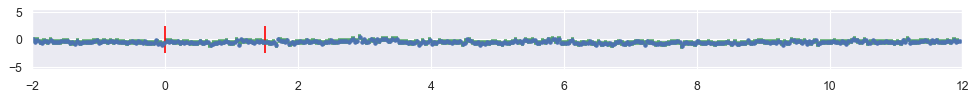

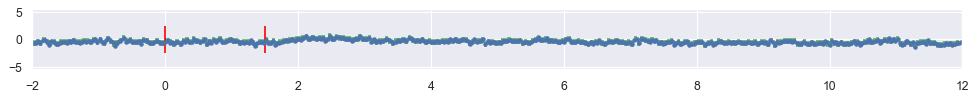

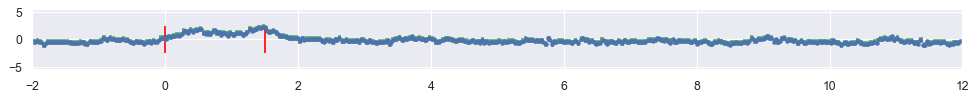

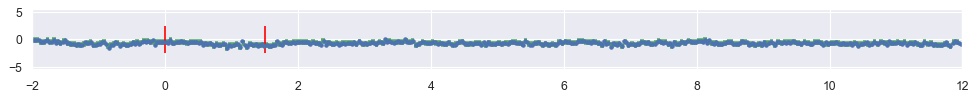

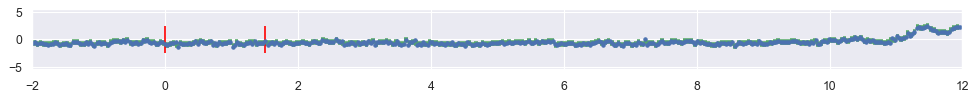

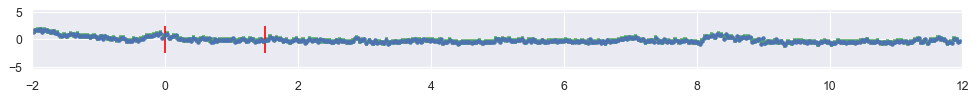

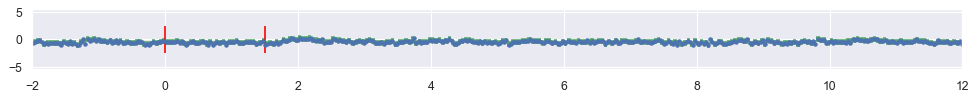

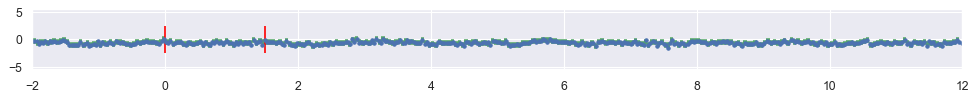

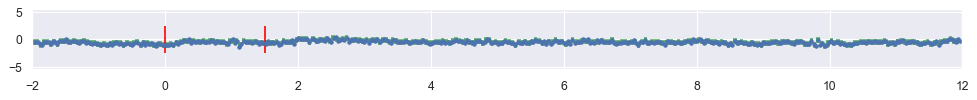

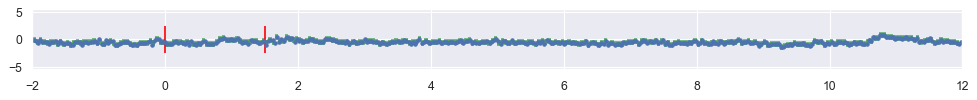

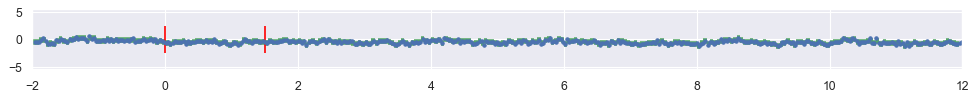

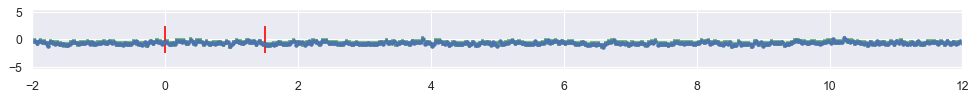

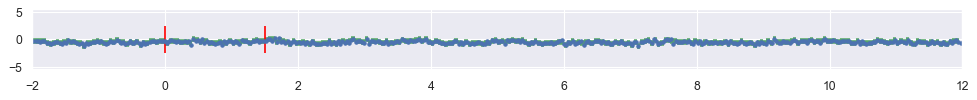

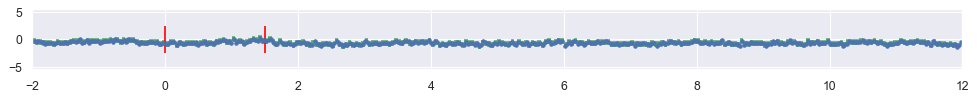

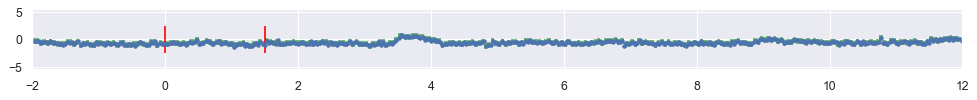

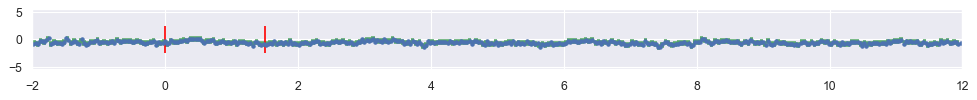

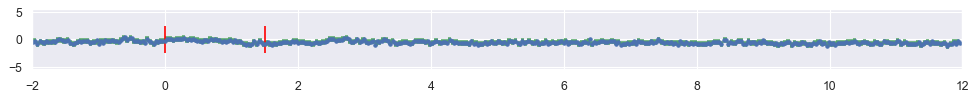

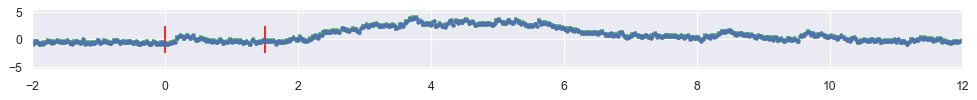

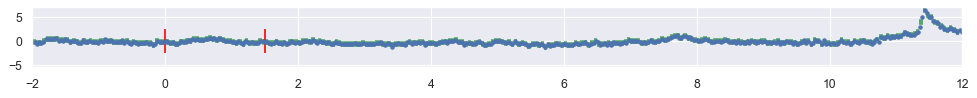

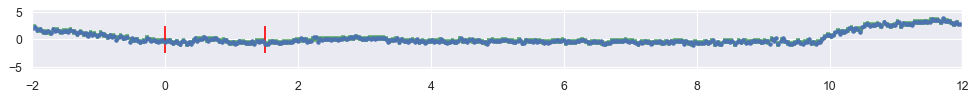

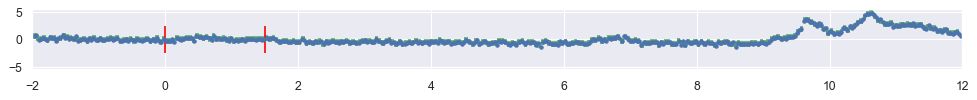

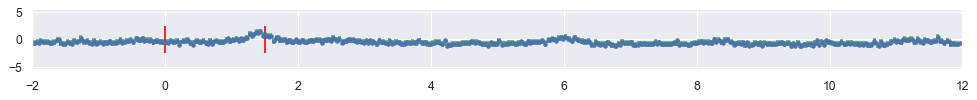

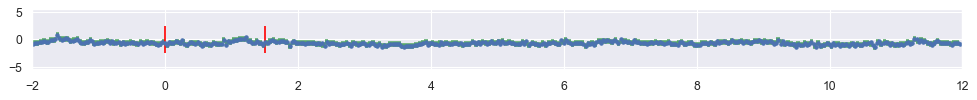

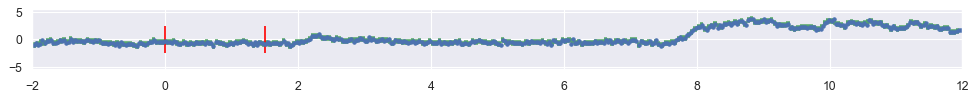

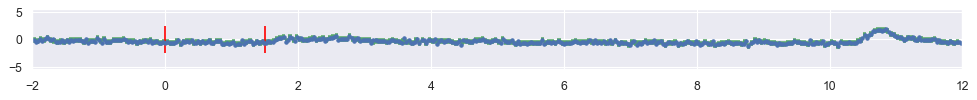

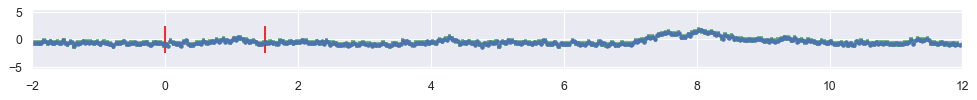

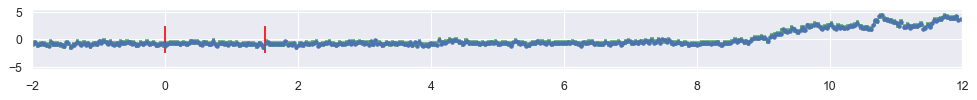

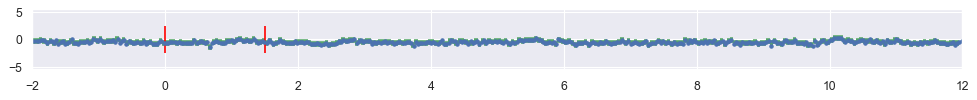

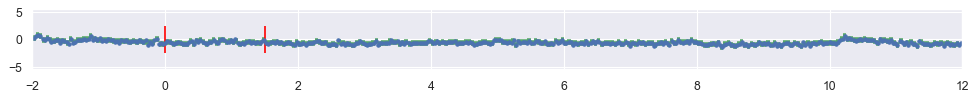

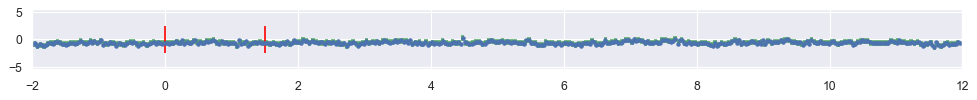

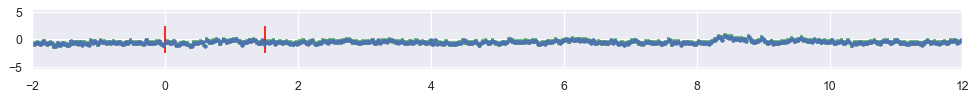

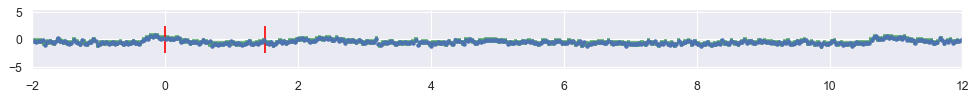

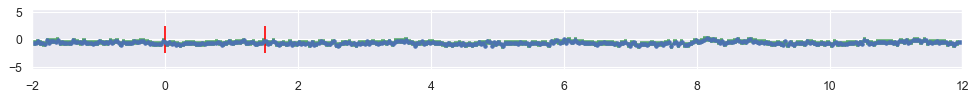

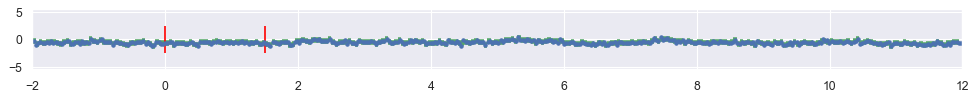

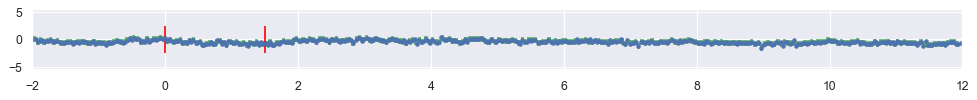

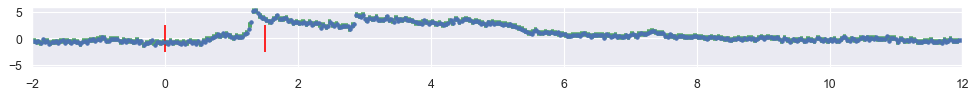

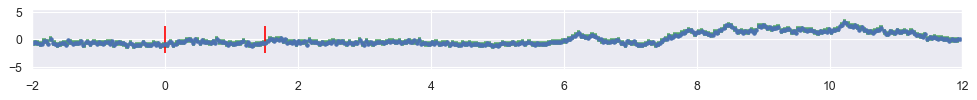

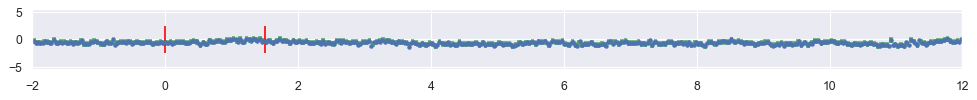

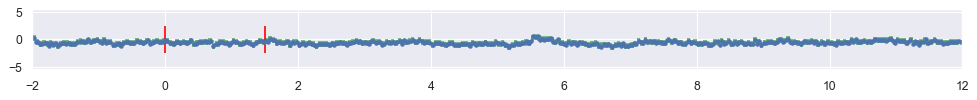

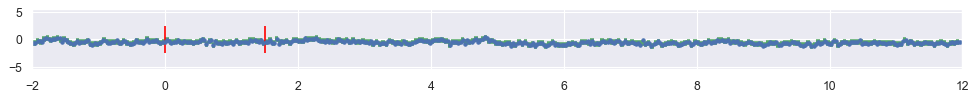

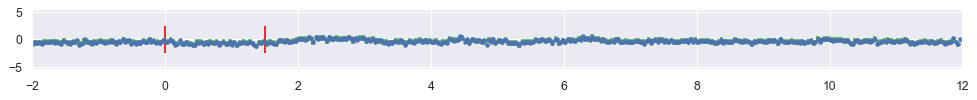

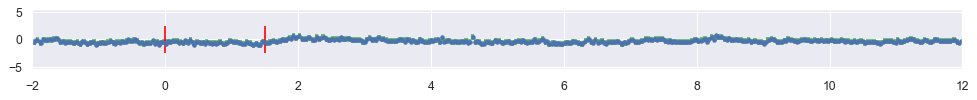

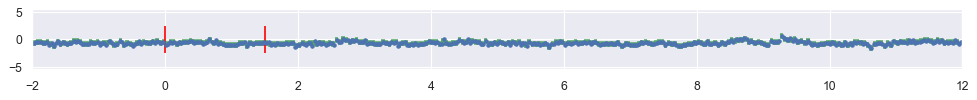

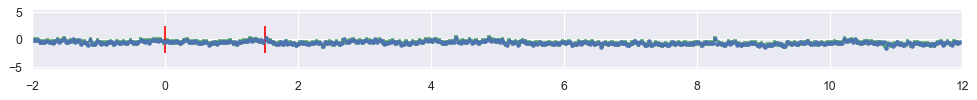

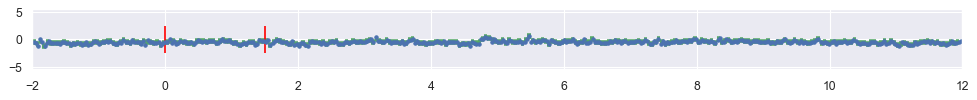

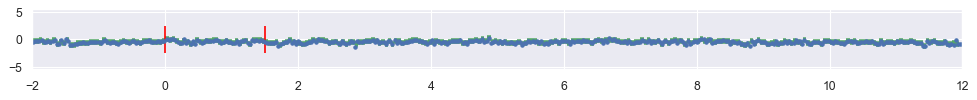

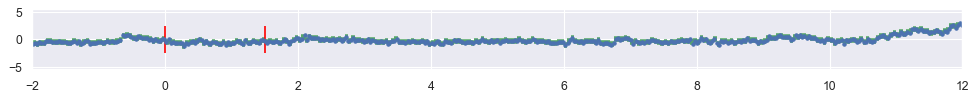

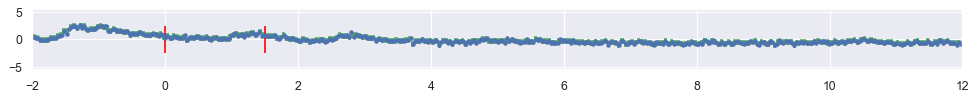

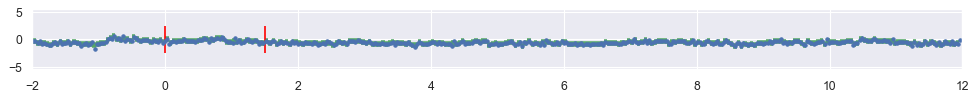

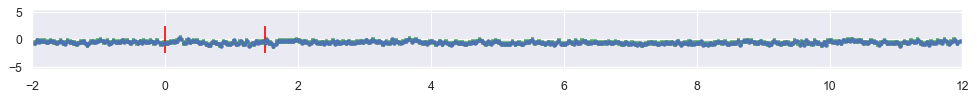

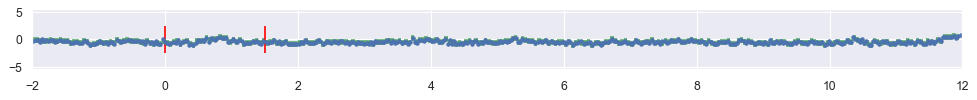

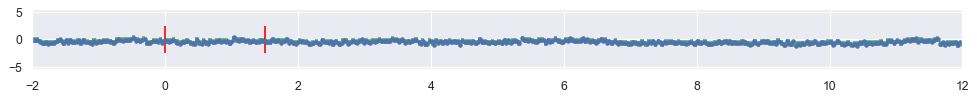

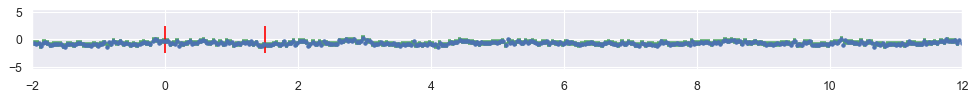

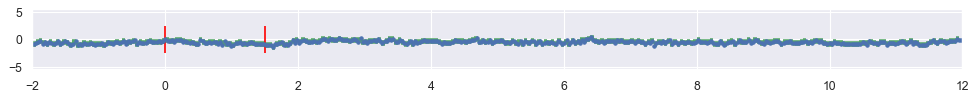

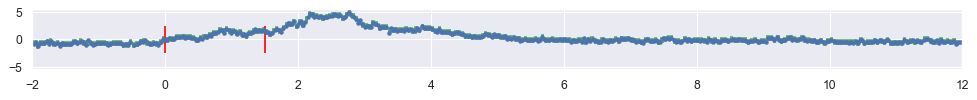

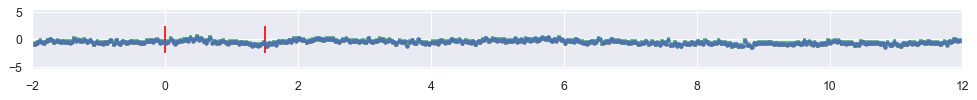

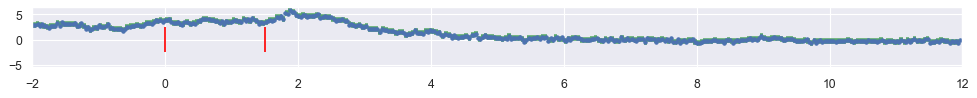

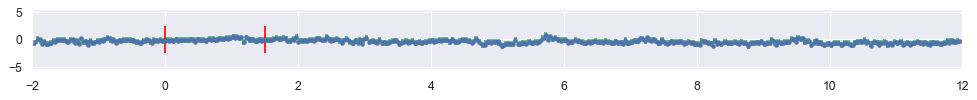

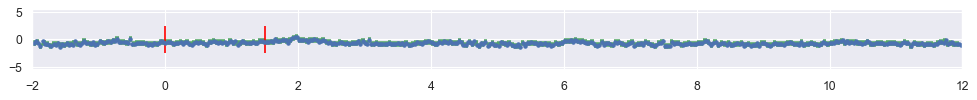

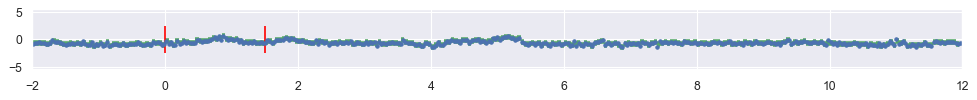

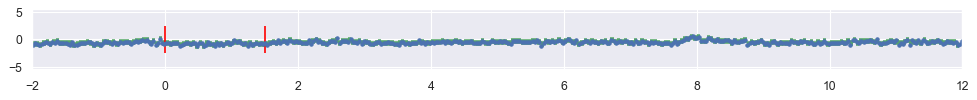

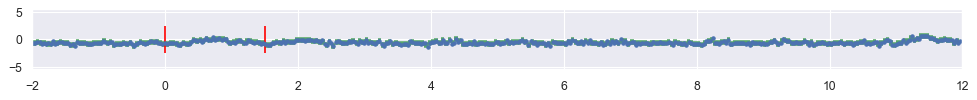

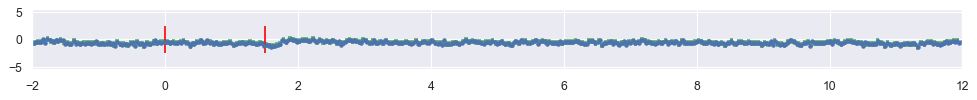

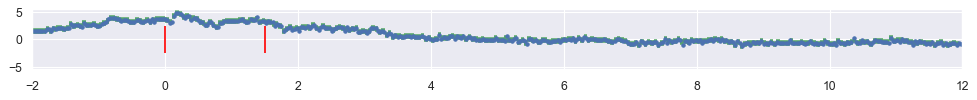

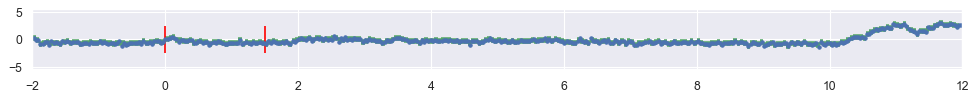

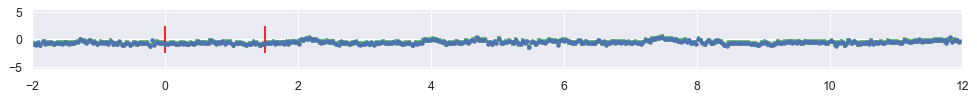

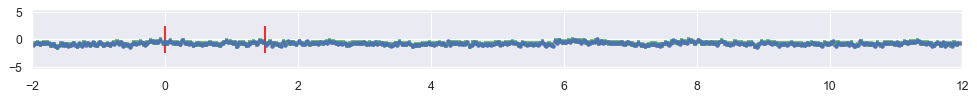

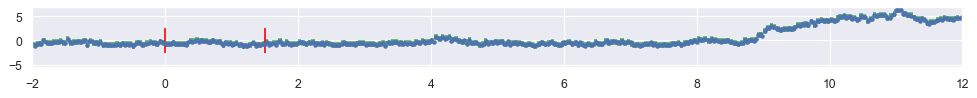

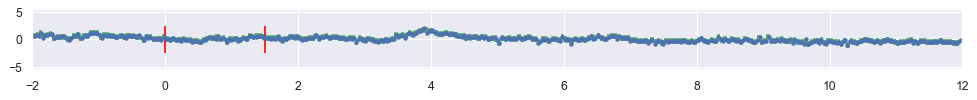

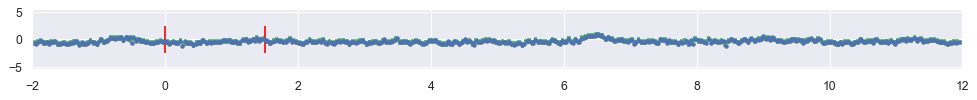

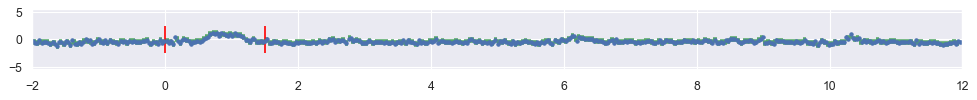

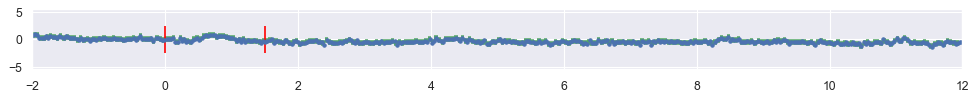

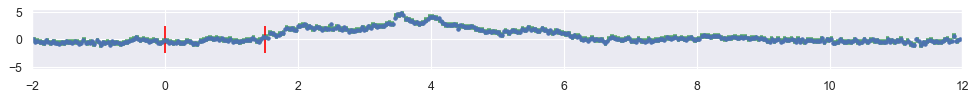

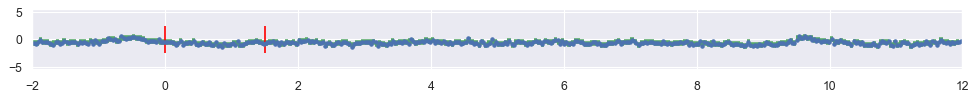

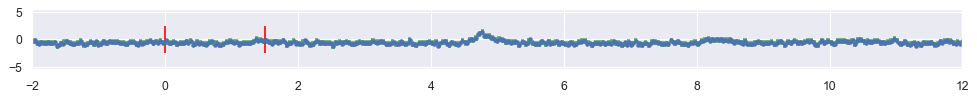

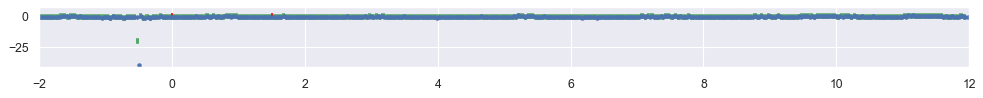

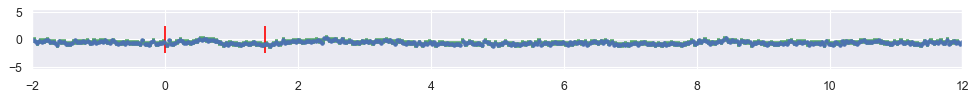

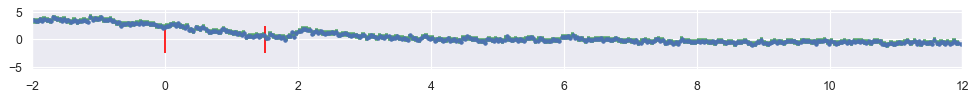

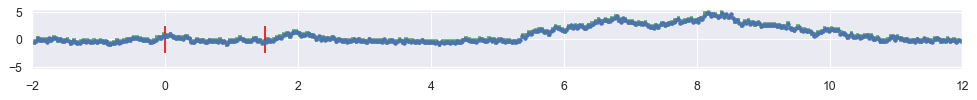

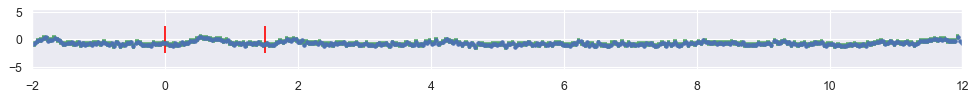

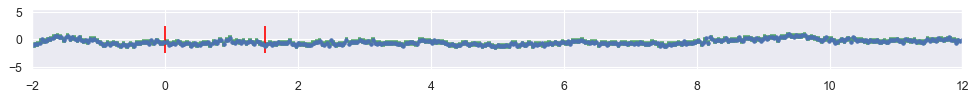

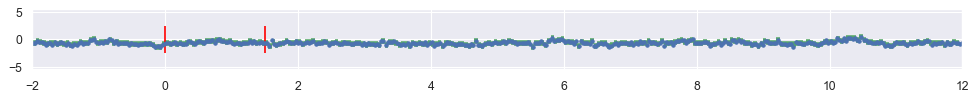

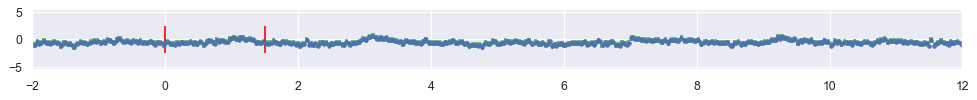

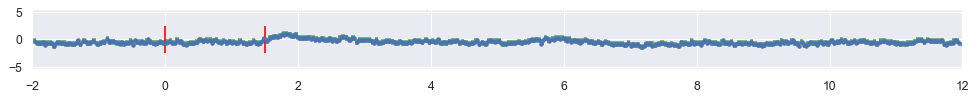

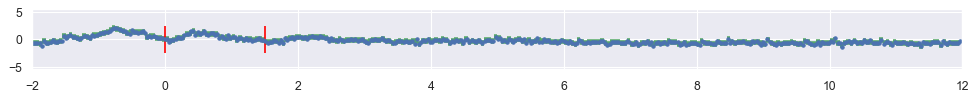

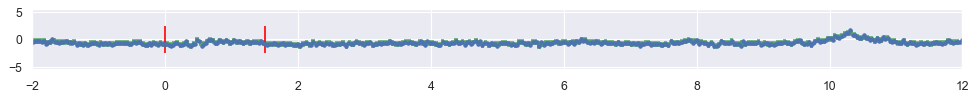

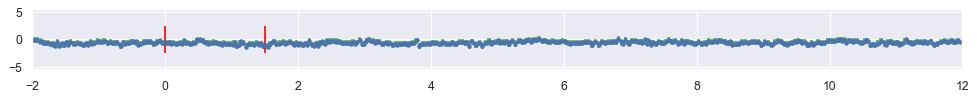

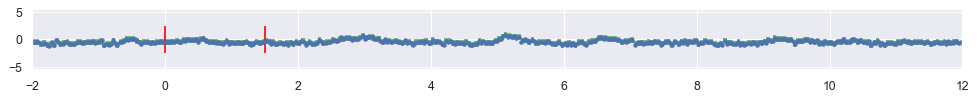

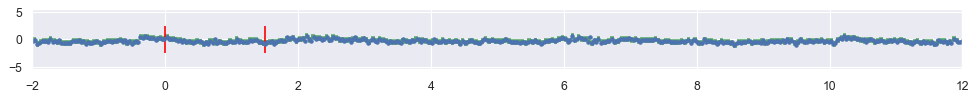

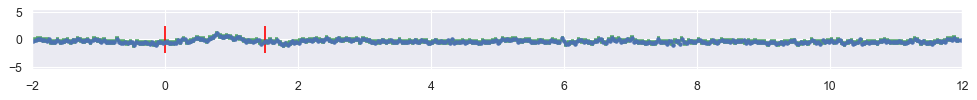

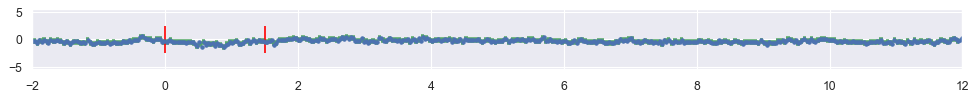

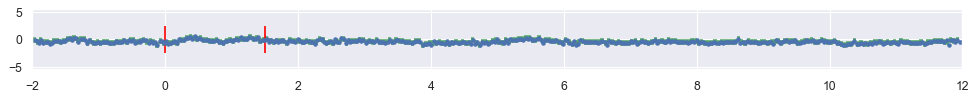

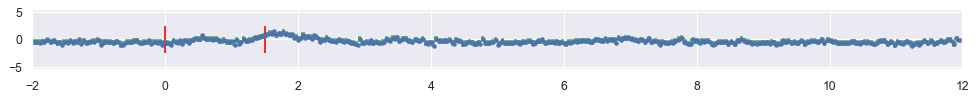

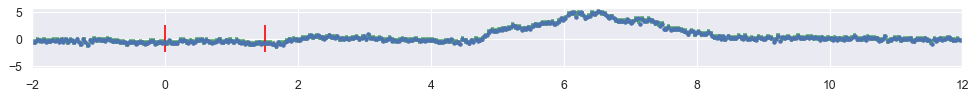

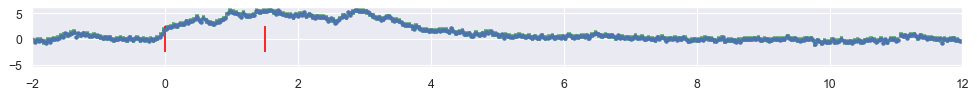

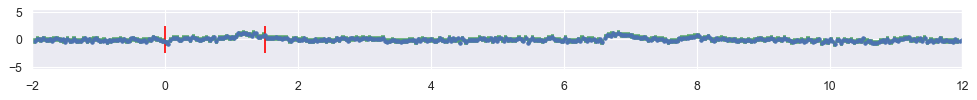

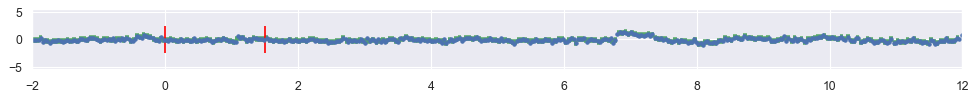

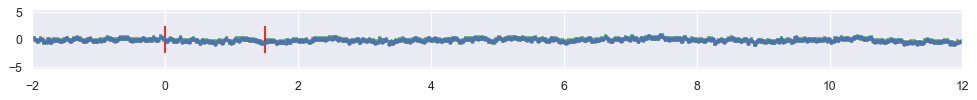

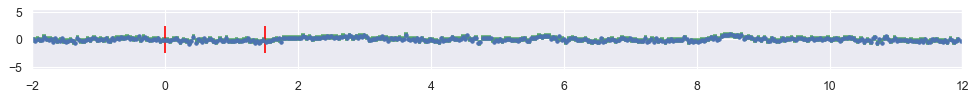

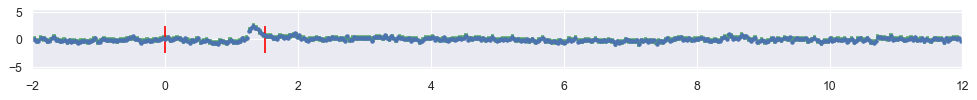

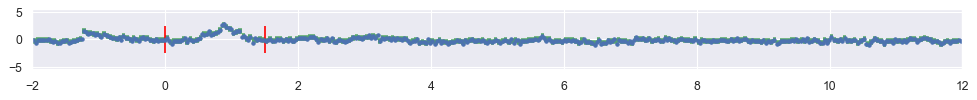

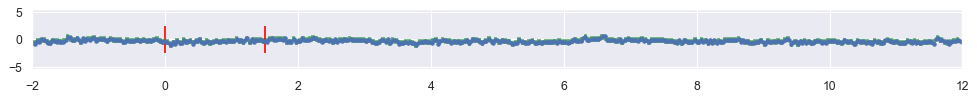

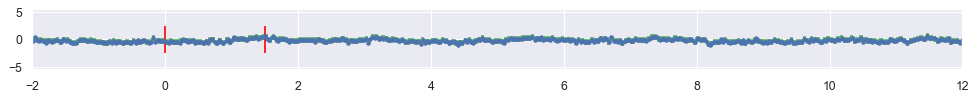

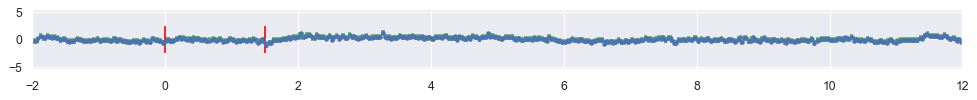

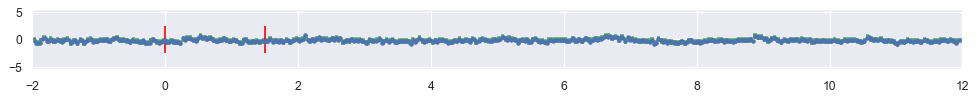

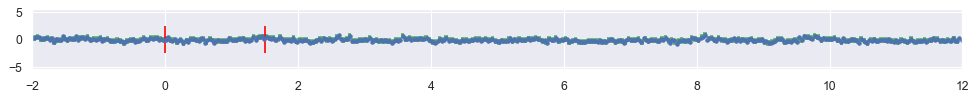

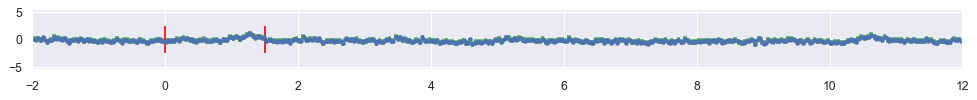

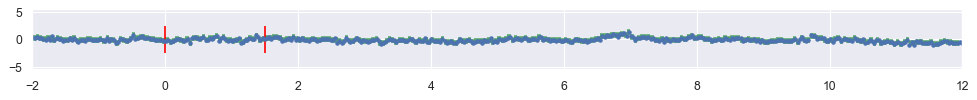

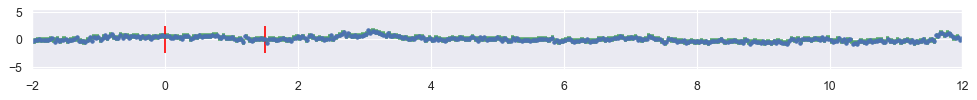

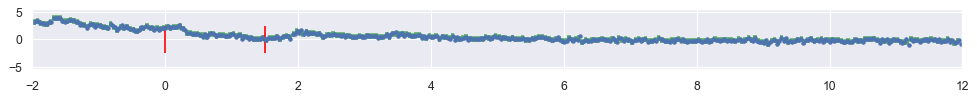

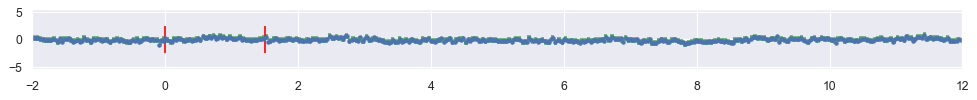

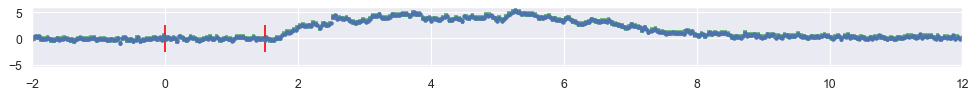

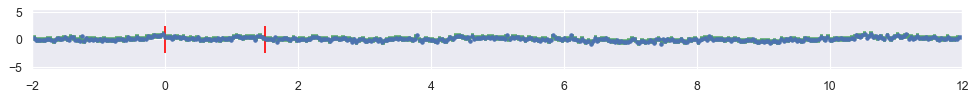

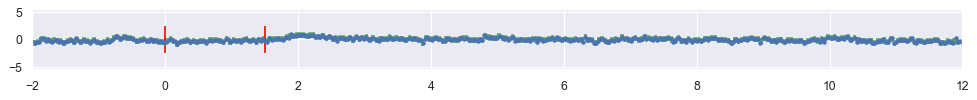

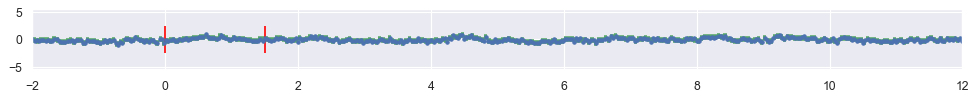

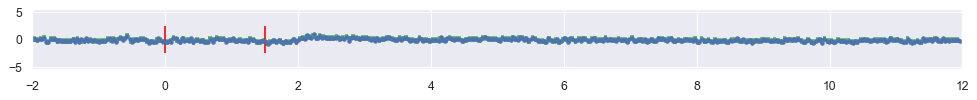

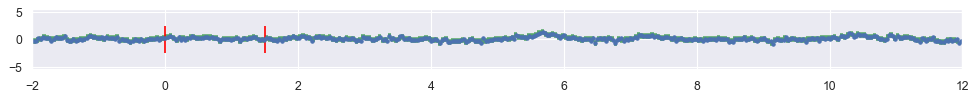

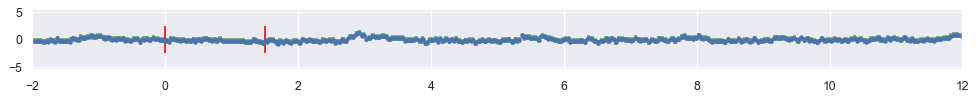

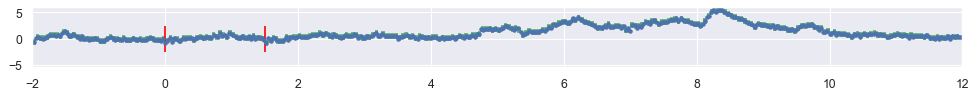

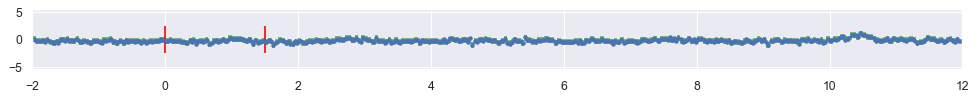

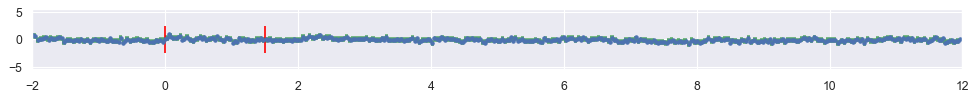

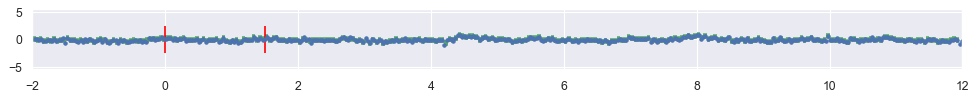

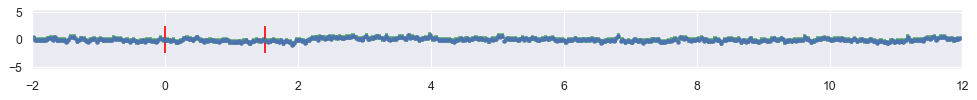

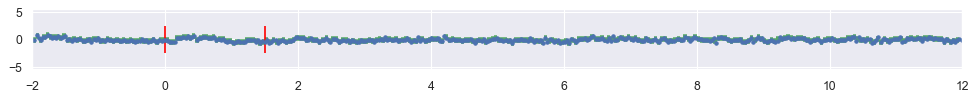

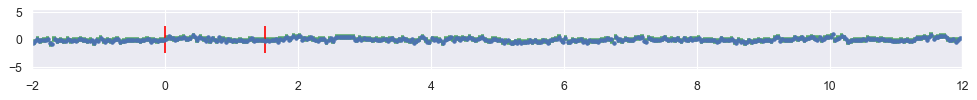

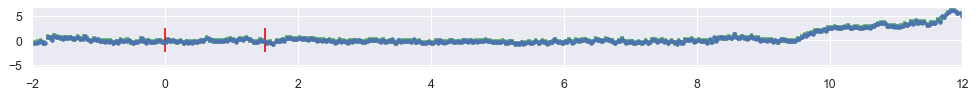

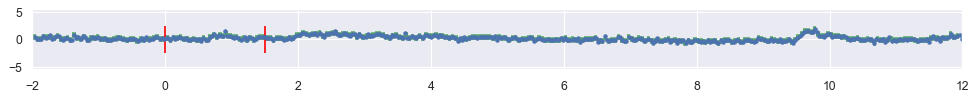

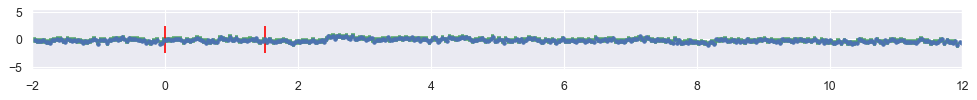

In [ ]:
# plt each trials
from scipy import stats
import matplotlib.pyplot as plt
time_wid = [-2,12]
bin_step = 0.05 # 0.05s
bins_arr = np.arange(time_wid[0],time_wid[1],bin_step)
transient_matrix = np.ones((len(trial_on_time),len(bins_arr)-1))
#print(np.shape(transient_matrix))
#transient_matrix = []
figure(figsize=(15,6), dpi=80)
aa = [];
trial_n = 0
#print(trial_on_time[0])
for i in cue_on_time:
    winStart  = i + time_wid[0] # 2s before cue
    winEnd    = i + time_wid[1]  # 12s after cue
    
    trancient = df_n.loc[(df_n["time"] > winStart) & (df_n["time"] <  winEnd)]
    #print(trancient)
    t_reset   = (trancient["time"]-i)

    figure(figsize=(15,1), dpi=80)
    #plt.subplot(399, 1,i)
    plt.plot(t_reset,trancient['data'], 'b.', label='data')
    #plt.eventplot(trial_on_time, color = colorCodes[0,:], lineoffsets=0,linelengths = 1)  
    #plt.ylim(-0.015, 0.015)
    plt.xlim(-2, 12)
    bin_means, bin_edges, binnumber = stats.binned_statistic(t_reset,
                trancient['data'], statistic = 'median',bins = bins_arr )
    #print(np.shape(bin_means))
    transient_matrix[trial_n,:] = bin_means
    #print(transient_matrix)
    trial_n = trial_n + 1
    plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors = 'g', lw = 5,
           label = 'binned statistic of data')
    #plt.legend()
    #plt.legend(loc='best')
    plt.eventplot([1.5], color = colorCodes[1,:], lineoffsets=0,linelengths = 5)  
    plt.eventplot([0], color = colorCodes[1,:], lineoffsets=0,linelengths = 5)  

    plt.show() 


In [ ]:
bins_arr = np.arange(time_wid[0],time_wid[1]+1,bin_step)
len(bins_arr)

In [ ]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
figure(figsize=(15,10), dpi=100)
tickstep = 1# step = 1s
bin_step = 0.05 # 0.05s
xticklab = np.arange(time_wid[0],time_wid[1]+1,tickstep)
#print(xticklab)
xtick = np.arange(0,(time_wid[1]-time_wid[0])/bin_step+1,tickstep/bin_step)
xtick_int = xtick.astype(int)
#print(xtick_int)
ytick_step = 20
print(len(trial_on_time))
ytick =  np.arange(0,len(trial_on_time)+1,ytick_step)
yticklab =  np.arange(1,len(trial_on_time)+2,ytick_step)
print(yticklab)
print(ytick)

#sns.color_palette("coolwarm", as_cmap=True)
#cmap="YlGnBu"
#ax = sns.heatmap( transient_matrix,vmin=-2, vmax=6,cbar_kws={'label': 'z-score'})
ax = sns.heatmap( transient_matrix,vmin=-2, vmax=6,cbar_kws={'label': 'z-score'},cmap="jet")


cueon_bin = abs(time_wid[0])/bin_step
plt.xticks(xtick_int,labels =  xticklab)
plt.yticks(ytick,labels =  yticklab)
plt.xticks(rotation=0)
print(cueon_bin)
cueoff_bin = (abs(time_wid[0])+1.5)/bin_step
plt.eventplot([cueoff_bin], color = colorCodes[0,:], lineoffsets=0,linelengths = 800)  
plt.eventplot([cueon_bin],  color = colorCodes[0,:], lineoffsets=0,linelengths = 800) 
plt.ylabel('Trials')
plt.xlabel('Time (s)')
plt.title(use_fn[0:-10]+' detrend')
#plt.scalebar('zscore')

In [ ]:
# plt each trials
from scipy import stats
import matplotlib.pyplot as plt
time_wid = [-2,12] # -2 s before the reward time
bin_step = 0.05 # 0.05s
bins_arr = np.arange(time_wid[0],time_wid[1],bin_step)
rw_transient_mat = np.ones((len(rw_time),len(bins_arr)-1))
cue_on_time = sucsessful_trial+0.5
#print(np.shape(transient_matrix))
#transient_matrix = []
figure(figsize=(15,6), dpi=80)
aa = [];
trial_n = 0

for i in cue_on_time:
    winStart  = i + time_wid[0] # 4s before reward
    winEnd    = i + time_wid[1]  # 12s after reward
    
    trancient = df_n.loc[(df_n["time"] > winStart) & (df_n["time"] <  winEnd)]
    #print(trancient)
    t_reset   = (trancient["time"]-i)

    figure(figsize=(15,1), dpi=80)
    #plt.subplot(399, 1,i)
    plt.plot(t_reset,trancient['data'], 'b.', label='data')
     
    #plt.ylim(-0.015, 0.015)
    plt.xlim(-2, 12)
    if not trancient['data'].empty:
        bin_means, bin_edges, binnumber = stats.binned_statistic(t_reset,
                trancient['data'], statistic = 'mean',bins = bins_arr )
    #print(np.shape(bin_means))
        rw_transient_mat[trial_n,:] = bin_means
    #print(transient_matrix)
        trial_n = trial_n + 1
        print(trial_n)
        plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors = 'g', lw = 5,
           label = 'binned statistic of data')
    #plt.legend()
    #plt.legend(loc='best')
        plt.eventplot([1.5], color = colorCodes[1,:], lineoffsets=0,linelengths = 5)  
        plt.eventplot([0], color = colorCodes[1,:], lineoffsets=0,linelengths = 5)  

        plt.show() 

In [ ]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
figure(figsize=(15,10), dpi=100)
#plt.subplot(2,1,1)
tickstep = 1# step = 1s
bin_step = 0.05 # 0.05s
xticklab = np.arange(time_wid[0],time_wid[1]+1,tickstep)
#print(xticklab)
xtick = np.arange(0,(time_wid[1]-time_wid[0])/bin_step+1,tickstep/bin_step)
xtick_int = xtick.astype(int)
#print(xtick_int)
ytick_step = 20
print(len(trial_on_time))
ytick =  np.arange(0,len(trial_on_time)+1,ytick_step)
yticklab =  np.arange(1,len(trial_on_time)+2,ytick_step)
print(yticklab)
print(ytick)

ax = sns.heatmap( rw_transient_mat,vmin=-2, vmax=6,cbar_kws={'label': 'z-score'},cmap="jet")

cueon_bin = abs(time_wid[0])/bin_step
plt.xticks(xtick_int,labels =  xticklab)
plt.yticks(ytick,labels =  yticklab)
plt.xticks(rotation=0)
print(cueon_bin)
cueoff_bin = (abs(time_wid[0])+1.5)/bin_step
plt.eventplot([cueoff_bin], color = colorCodes[0,:], lineoffsets=0,linelengths = np.max(ytick)*2)  
plt.eventplot([cueon_bin],  color = colorCodes[0,:], lineoffsets=0,linelengths = np.max(ytick)*2) 
plt.ylabel('Trials')
plt.xlabel('Time (s)')
plt.title('Reward trials '+use_fn[0:-10]+' detrend')
#plt.scalebar('zscore')

import statistics

figure(figsize=(12.3,4), dpi=80)
#print(rw_transient_mat)

average_trace = np.nanmean(rw_transient_mat, axis=0)
std_trace = np.nanstd(rw_transient_mat, axis=0)
print(np.shape(average_trace))
print(len(bin_edges))
plt.errorbar(bin_edges[0:-1], average_trace,std_trace,fmt ='o')
plt.eventplot([1.5], color = colorCodes[1,:], lineoffsets=0,linelengths = 5)  
plt.eventplot([0], color = colorCodes[1,:], lineoffsets=0,linelengths = 5)  
plt.ylabel('z-score')
plt.xlabel('Time (s)')
plt.ylim(-2,2.5)
plt.xlim(-2,12)
plt.show() 


In [ ]:
# plt each trials
from scipy import stats
import matplotlib.pyplot as plt
time_wid = [-2,12] # -4 s before the reward time
bin_step = 0.05 # 0.05s
bins_arr = np.arange(time_wid[0],time_wid[1],bin_step)
miss_rw_transient_mat = np.ones((len(miss_rw_time),len(bins_arr)-1))
print(np.shape(miss_rw_transient_mat))
#transient_matrix = []
figure(figsize=(15,6), dpi=80)
aa = [];
trial_n = 0
cue_on_time = mis_trial+0.5 # 0.5s afer 
for i in cue_on_time:
    winStart  = i + time_wid[0] # 4s before reward
    winEnd    = i + time_wid[1]  # 12s after reward
    
    trancient = df_n.loc[(df_n["time"] > winStart) & (df_n["time"] <  winEnd)]
    #print(trancient)
    t_reset   = (trancient["time"]-i)

    figure(figsize=(15,1), dpi=80)
    #plt.subplot(399, 1,i)
    plt.plot(t_reset,trancient['data'], 'b.', label='data')
     
    #plt.ylim(-0.015, 0.015)
    plt.xlim(-2, 12)
    if not trancient['data'].empty:
        bin_means, bin_edges, binnumber = stats.binned_statistic(t_reset,
                trancient['data'], statistic = 'mean',bins = bins_arr )
    #print(np.shape(bin_means))
        miss_rw_transient_mat[trial_n,:] = bin_means
    #print(transient_matrix)
        trial_n = trial_n + 1
        print(trial_n)
        plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors = 'g', lw = 5,
           label = 'binned statistic of data')
    #plt.legend()
    #plt.legend(loc='best')
        plt.eventplot([1.5], color = colorCodes[1,:], lineoffsets=0,linelengths = 5)  
        plt.eventplot([0], color = colorCodes[1,:], lineoffsets=0,linelengths = 5)  

        plt.show() 

In [ ]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
figure(figsize=(15,10), dpi=100)
tickstep = 1# step = 1s
bin_step = 0.05 # 0.05s
xticklab = np.arange(time_wid[0],time_wid[1]+1,tickstep)
#print(xticklab)
xtick = np.arange(0,(time_wid[1]-time_wid[0])/bin_step+1,tickstep/bin_step)
xtick_int = xtick.astype(int)
#print(xtick_int)
ytick_step = 20
print(len(rw_time))
#ytick =  np.arange(0,len(miss_rw_time)+1,ytick_step)
#yticklab =  np.arange(1,len(miss_rw_time)+2,ytick_step)
ytick =  np.arange(0,len(trial_on_time)+1,ytick_step)
yticklab =  np.arange(1,len(trial_on_time)+2,ytick_step)

print(yticklab)
print(np.max(ytick))

#sns.color_palette("coolwarm", as_cmap=True)
#cmap="YlGnBu"
#ax = sns.heatmap( transient_matrix,vmin=-2, vmax=6,cbar_kws={'label': 'z-score'})
print(np.shape(miss_rw_transient_mat))
ax = sns.heatmap( miss_rw_transient_mat,vmin=-2, vmax=6,cbar_kws={'label': 'z-score'},cmap="jet")
#ax = sns.heatmap( transient_matrix,vmin=-2, vmax=6,cbar_kws={'label': 'z-score'},cmap="YlGnBu")

#ax = sns.heatmap( transient_matrix,cbar_kws={'label': 'z-score'})
# cueon  0s
# cueoff 1.5s

cueon_bin = abs(time_wid[0])/bin_step
plt.xticks(xtick_int,labels =  xticklab)
plt.yticks(ytick,labels =  yticklab)
plt.xticks(rotation=0)
print(cueon_bin)
cueoff_bin = (abs(time_wid[0])+1.5)/bin_step
plt.eventplot([cueoff_bin], color = colorCodes[0,:], lineoffsets=0,linelengths = np.max(ytick)*2)  
plt.eventplot([cueon_bin],  color = colorCodes[0,:], lineoffsets=0,linelengths = np.max(ytick)*2) 
plt.ylabel('Trials')
plt.xlabel('Time (s)')
plt.title('No reward'+ use_fn[0:-10]+' detrend'+'correct trial')
#plt.scalebar('zscore)

figure(figsize=(12.5,4), dpi=80)
average_trace = np.nanmean(miss_rw_transient_mat, axis=0)
std_trace = np.nanstd(miss_rw_transient_mat, axis=0)
print(np.shape(average_trace))
print(len(bin_edges))
plt.errorbar(bin_edges[0:-1], average_trace,std_trace,fmt ='o')
plt.eventplot([1.5], color = colorCodes[1,:], lineoffsets=0,linelengths = 10)  
plt.eventplot([0], color = colorCodes[1,:], lineoffsets=0,linelengths = 10)  
plt.ylabel('z-score')
plt.xlabel('Time (s)')
plt.ylim(-2,3.5)
plt.xlim(-2,12)
plt.show()


In [ ]:
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

In [ ]:
import winsound
duration = 1000  # milliseconds
freq = 440  # Hz
winsound.Beep(freq, duration)